In [1]:
import pandas as pd
import torch
from sklearn.preprocessing import StandardScaler

# Load CSVs (features x samples format, so we need to transpose)
gene_df = pd.read_csv("../NewDatasets/processed_expression_FXS_OG.csv", index_col=0).T
meth_df = pd.read_csv("../NewDatasets/processed_methylation_FXS_OG.csv", index_col=0).T
cnv_df  = pd.read_csv("../NewDatasets/processed_cnv_FXS_OG.csv", index_col=0).T

# apply standard scaling to all data
scaler_meth = StandardScaler()
meth_df = pd.DataFrame(
    scaler_meth.fit_transform(meth_df.T).T,
    index=meth_df.index,
    columns=meth_df.columns
)

scaler_cnv = StandardScaler()
cnv_df = pd.DataFrame(
    scaler_cnv.fit_transform(cnv_df.T).T,
    index=cnv_df.index,
    columns=cnv_df.columns
)
scaler_gene = StandardScaler()
gene_df = pd.DataFrame(
    scaler_gene.fit_transform(gene_df.T).T,
    index=gene_df.index,
    columns=gene_df.columns
)

print("After transpose - Shapes (samples x features):")
print(f"gene_df: {gene_df.shape}")
print(f"meth_df: {meth_df.shape}")
print(f"cnv_df: {cnv_df.shape}")

After transpose - Shapes (samples x features):
gene_df: (205, 44663)
meth_df: (205, 419542)
cnv_df: (205, 56756)


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [3]:
print("NaN counts:", gene_df.isna().sum().sum(),
      meth_df.isna().sum().sum(),
      cnv_df.isna().sum().sum())


NaN counts: 0 0 0


In [4]:
gene_df = gene_df.fillna(0.0)
meth_df = meth_df.fillna(0.0)
cnv_df  = cnv_df.fillna(0.0)


In [5]:
print("Shapes:", gene_df.shape, meth_df.shape, cnv_df.shape)
# Align samples across all three omics
common = gene_df.index.intersection(meth_df.index).intersection(cnv_df.index)
gene_df = gene_df.loc[common]
meth_df = meth_df.loc[common]
cnv_df  = cnv_df.loc[common]

print("Shapes:", gene_df.shape, meth_df.shape, cnv_df.shape)
# Convert to float32 tensors
gene = torch.tensor(gene_df.values, dtype=torch.float32).to(device)
meth = torch.tensor(meth_df.values, dtype=torch.float32).to(device)
cnv  = torch.tensor(cnv_df.values, dtype=torch.float32).to(device)


Shapes: (205, 44663) (205, 419542) (205, 56756)
Shapes: (205, 44663) (205, 419542) (205, 56756)


Epoch 1/400 | Train Loss: 1.0137 | Val Loss: 1.1087
Epoch 10/400 | Train Loss: 0.9965 | Val Loss: 1.0206
Epoch 20/400 | Train Loss: 0.9872 | Val Loss: 1.0046
Epoch 30/400 | Train Loss: 0.9108 | Val Loss: 0.9483
Epoch 40/400 | Train Loss: 0.8884 | Val Loss: 0.9058
Epoch 50/400 | Train Loss: 0.8362 | Val Loss: 0.8858
Epoch 60/400 | Train Loss: 0.8078 | Val Loss: 0.8681
Epoch 70/400 | Train Loss: 0.7729 | Val Loss: 0.8496
Epoch 80/400 | Train Loss: 0.7515 | Val Loss: 0.8419
Epoch 90/400 | Train Loss: 0.7265 | Val Loss: 0.8321
Epoch 100/400 | Train Loss: 0.7100 | Val Loss: 0.8304
Epoch 110/400 | Train Loss: 0.6945 | Val Loss: 0.8268
Epoch 120/400 | Train Loss: 0.6783 | Val Loss: 0.8267
Epoch 130/400 | Train Loss: 0.6691 | Val Loss: 0.8200
Epoch 140/400 | Train Loss: 0.6507 | Val Loss: 0.8208
Epoch 150/400 | Train Loss: 0.6390 | Val Loss: 0.8214
Epoch 160/400 | Train Loss: 0.6273 | Val Loss: 0.8167
Early stopping triggered!


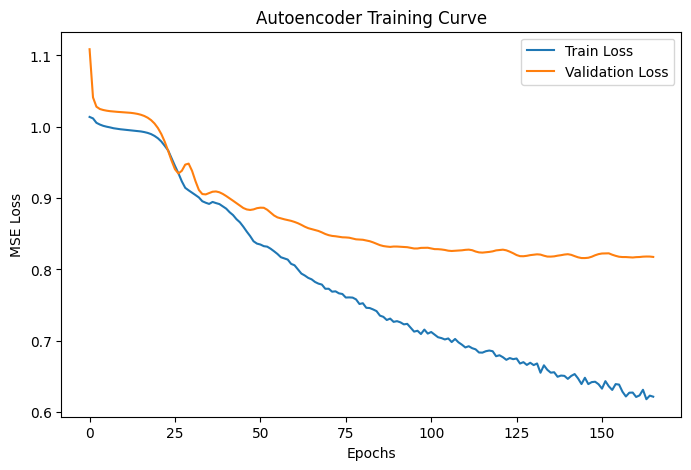

Epoch 1/400 | Train Loss: 1.0418 | Val Loss: 8.0381
Epoch 10/400 | Train Loss: 1.0226 | Val Loss: 0.9269
Epoch 20/400 | Train Loss: 1.0193 | Val Loss: 0.9260
Epoch 30/400 | Train Loss: 1.0188 | Val Loss: 0.9258
Epoch 40/400 | Train Loss: 1.0183 | Val Loss: 0.9254
Epoch 50/400 | Train Loss: 1.0104 | Val Loss: 0.9180
Epoch 60/400 | Train Loss: 0.9231 | Val Loss: 0.8627
Epoch 70/400 | Train Loss: 0.8879 | Val Loss: 0.8460
Epoch 80/400 | Train Loss: 0.8698 | Val Loss: 0.8431
Early stopping triggered!


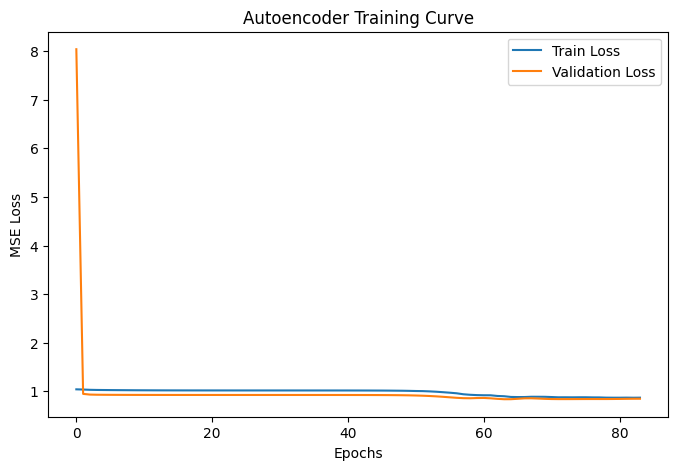

Epoch 1/400 | Train Loss: 1.0155 | Val Loss: 1.1067
Epoch 10/400 | Train Loss: 0.9953 | Val Loss: 1.0304
Epoch 20/400 | Train Loss: 0.9929 | Val Loss: 1.0300
Epoch 30/400 | Train Loss: 0.9918 | Val Loss: 1.0296
Epoch 40/400 | Train Loss: 0.9763 | Val Loss: 1.0179
Epoch 50/400 | Train Loss: 0.8983 | Val Loss: 0.9682
Epoch 60/400 | Train Loss: 0.8293 | Val Loss: 0.9306
Epoch 70/400 | Train Loss: 0.7849 | Val Loss: 0.9106
Epoch 80/400 | Train Loss: 0.7479 | Val Loss: 0.8988
Epoch 90/400 | Train Loss: 0.7058 | Val Loss: 0.8884
Epoch 100/400 | Train Loss: 0.6708 | Val Loss: 0.8793
Epoch 110/400 | Train Loss: 0.6443 | Val Loss: 0.8709
Epoch 120/400 | Train Loss: 0.6267 | Val Loss: 0.8644
Epoch 130/400 | Train Loss: 0.6097 | Val Loss: 0.8638
Epoch 140/400 | Train Loss: 0.5879 | Val Loss: 0.8589
Epoch 150/400 | Train Loss: 0.5721 | Val Loss: 0.8595
Epoch 160/400 | Train Loss: 0.5656 | Val Loss: 0.8618
Epoch 170/400 | Train Loss: 0.5477 | Val Loss: 0.8571
Early stopping triggered!


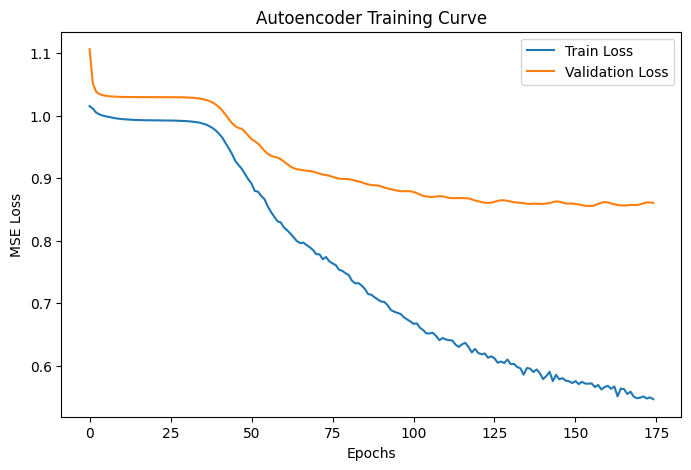

Fused latent shape: torch.Size([205, 192])


In [6]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler

# ------------------ Autoencoder with Dropout (Same architecture as MLP) ------------------
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim=64, dropout=0.3):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, input_dim)
        )

    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return z, x_recon

# ------------------ Training with validation & early stopping ------------------
def train_autoencoder(model, data, epochs=400, patience=20, normalize=True):
    # Optionally normalize features to mean=0, std=1
    if normalize:
        scaler = StandardScaler()
        data_np = scaler.fit_transform(data.cpu().numpy())
    else:
        data_np = data.cpu().numpy()

    # Split into train/val
    X_train, X_val = train_test_split(data_np, test_size=0.2, random_state=42)
    X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
    X_val   = torch.tensor(X_val, dtype=torch.float32).to(device)

    optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
    criterion = nn.MSELoss()

    train_losses, val_losses = [], []
    best_val_loss = np.inf
    best_model_state = None
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        z, recon = model(X_train)
        loss = criterion(recon, X_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Validation
        model.eval()
        with torch.no_grad():
            _, val_recon = model(X_val)
            val_loss = criterion(val_recon, X_val)

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())

        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs} | Train Loss: {loss.item():.4f} | Val Loss: {val_loss.item():.4f}")

        # Early stopping
        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_model_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered!")
                break

    # Restore best model
    if best_model_state:
        model.load_state_dict(best_model_state)

    # Plot loss curves
    plt.figure(figsize=(8, 5))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("MSE Loss")
    plt.title("Autoencoder Training Curve")
    plt.legend()
    plt.show()

    return model

# ------------------ Train per omic ------------------
gene_dim, meth_dim, cnv_dim = gene.shape[1], meth.shape[1], cnv.shape[1]

ae_gene = Autoencoder(gene_dim, latent_dim=64).to(device)
ae_meth = Autoencoder(meth_dim, latent_dim=64).to(device)
ae_cnv  = Autoencoder(cnv_dim,  latent_dim=64).to(device)

ae_gene = train_autoencoder(ae_gene, gene, normalize=True)
ae_meth = train_autoencoder(ae_meth, meth, normalize=True)
ae_cnv  = train_autoencoder(ae_cnv, cnv, normalize=True)

# ------------------ Extract latents & fuse ------------------
ae_gene.eval(); ae_meth.eval(); ae_cnv.eval()
with torch.no_grad():
    z_gene, _ = ae_gene(gene.to(device))
    z_meth, _ = ae_meth(meth.to(device))
    z_cnv,  _ = ae_cnv(cnv.to(device))

z_fused = torch.cat([z_gene, z_meth, z_cnv], dim=1)
print("Fused latent shape:", z_fused.shape)


C:\Users\shini\AppData\Local\Temp\ipykernel_2440\3664053606.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(errs_train, label="Train", shade=True)
C:\Users\shini\AppData\Local\Temp\ipykernel_2440\3664053606.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(errs_val, label="Validation", shade=True)


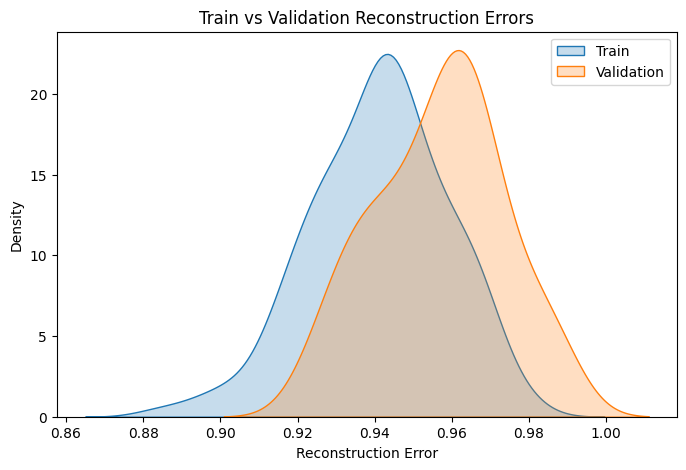

Median Train Err: 0.9424 | Median Val Err: 0.9594
Epoch 1/400 | Train Loss: 1.0196 | Val Loss: 1.0800
Epoch 10/400 | Train Loss: 0.9972 | Val Loss: 1.0206
Epoch 20/400 | Train Loss: 0.9795 | Val Loss: 0.9868
Epoch 30/400 | Train Loss: 0.9023 | Val Loss: 0.9273
Epoch 40/400 | Train Loss: 0.8740 | Val Loss: 0.8933
Epoch 50/400 | Train Loss: 0.8293 | Val Loss: 0.8772
Epoch 60/400 | Train Loss: 0.7968 | Val Loss: 0.8618
Epoch 70/400 | Train Loss: 0.7681 | Val Loss: 0.8478
Epoch 80/400 | Train Loss: 0.7439 | Val Loss: 0.8391
Epoch 90/400 | Train Loss: 0.7230 | Val Loss: 0.8303
Epoch 100/400 | Train Loss: 0.7055 | Val Loss: 0.8223
Epoch 110/400 | Train Loss: 0.6857 | Val Loss: 0.8218
Epoch 120/400 | Train Loss: 0.6706 | Val Loss: 0.8195
Epoch 130/400 | Train Loss: 0.6567 | Val Loss: 0.8180
Epoch 140/400 | Train Loss: 0.6490 | Val Loss: 0.8108
Epoch 150/400 | Train Loss: 0.6366 | Val Loss: 0.8074
Epoch 160/400 | Train Loss: 0.6183 | Val Loss: 0.8084
Epoch 170/400 | Train Loss: 0.6128 | Val Lo

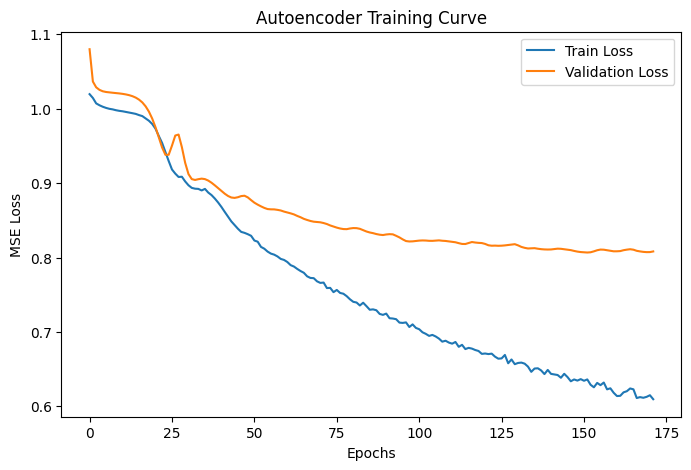

Epoch 1/400 | Train Loss: 1.0185 | Val Loss: 1.0731
Epoch 10/400 | Train Loss: 0.9969 | Val Loss: 1.0207
Epoch 20/400 | Train Loss: 0.9880 | Val Loss: 1.0060
Epoch 30/400 | Train Loss: 0.9103 | Val Loss: 0.9539
Epoch 40/400 | Train Loss: 0.8856 | Val Loss: 0.9025
Epoch 50/400 | Train Loss: 0.8254 | Val Loss: 0.8712
Epoch 60/400 | Train Loss: 0.7869 | Val Loss: 0.8549
Epoch 70/400 | Train Loss: 0.7603 | Val Loss: 0.8466
Epoch 80/400 | Train Loss: 0.7361 | Val Loss: 0.8353
Epoch 90/400 | Train Loss: 0.7154 | Val Loss: 0.8265
Epoch 100/400 | Train Loss: 0.6911 | Val Loss: 0.8212
Epoch 110/400 | Train Loss: 0.6795 | Val Loss: 0.8196
Epoch 120/400 | Train Loss: 0.6648 | Val Loss: 0.8176
Epoch 130/400 | Train Loss: 0.6575 | Val Loss: 0.8158
Epoch 140/400 | Train Loss: 0.6403 | Val Loss: 0.8134
Epoch 150/400 | Train Loss: 0.6328 | Val Loss: 0.8123
Epoch 160/400 | Train Loss: 0.6177 | Val Loss: 0.8105
Epoch 170/400 | Train Loss: 0.6061 | Val Loss: 0.8108
Epoch 180/400 | Train Loss: 0.6018 | Va

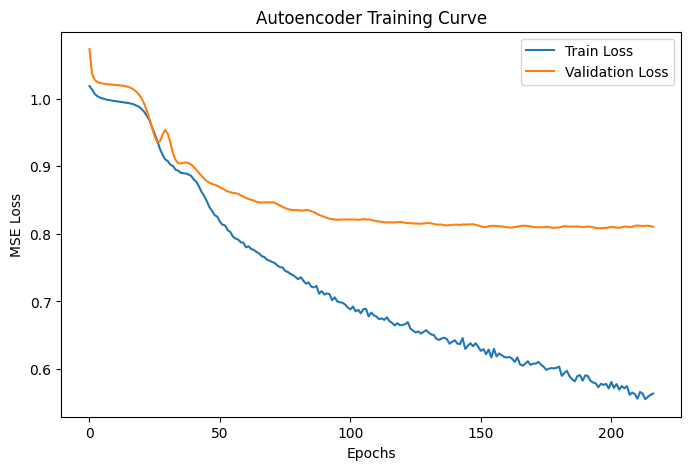

Latent stability (corr between runs): 0.020
Silhouette on fused latents: 0.12338799983263016


In [7]:
from sklearn.metrics import silhouette_score
import seaborn as sns

# ------------------ Diagnostics ------------------
def reconstruction_error_distribution(model, X_train_np, X_val_np, device):
    """Compute and plot per-sample reconstruction errors for train/val."""
    def recon_errors(X_np):
        model.eval()
        with torch.no_grad():
            X_t = torch.tensor(X_np, dtype=torch.float32).to(device)
            _, recon = model(X_t)
        errs = ((recon.cpu().numpy() - X_np)**2).mean(axis=1)
        return errs

    errs_train = recon_errors(X_train_np)
    errs_val   = recon_errors(X_val_np)

    # KDE plots
    plt.figure(figsize=(8,5))
    sns.kdeplot(errs_train, label="Train", shade=True)
    sns.kdeplot(errs_val, label="Validation", shade=True)
    plt.xlabel("Reconstruction Error")
    plt.ylabel("Density")
    plt.title("Train vs Validation Reconstruction Errors")
    plt.legend()
    plt.show()

    print(f"Median Train Err: {np.median(errs_train):.4f} | Median Val Err: {np.median(errs_val):.4f}")

    return errs_train, errs_val

def latent_stability_check(model_class, data, latent_dim, device, n_runs=2):
    """Train AE multiple times and check correlation between latent spaces."""
    latents = []
    for seed in range(n_runs):
        torch.manual_seed(seed)
        np.random.seed(seed)
        model = model_class(data.shape[1], latent_dim=latent_dim).to(device)
        model = train_autoencoder(model, data, normalize=True)
        with torch.no_grad():
            z, _ = model(data.to(device))
        latents.append(z.cpu().numpy())

    # Compare pairwise correlations
    corr = np.corrcoef(latents[0].ravel(), latents[1].ravel())[0,1]
    print(f"Latent stability (corr between runs): {corr:.3f}")

    return corr

# ------------------ Example usage ------------------
# After training each AE, run diagnostics:
# (inside train_autoencoder, you already split train/val)

# 1. Check per-sample reconstruction errors
X_train_np, X_val_np = train_test_split(gene.cpu().numpy(), test_size=0.2, random_state=42)
errs_train, errs_val = reconstruction_error_distribution(ae_gene, X_train_np, X_val_np, device)

# 2. Latent stability
latent_stability_check(Autoencoder, gene, latent_dim=64, device=device)

# 3. (Optional) Quick clustering sanity check on fused latents
from sklearn.cluster import KMeans
z_np = z_fused.cpu().numpy()
kmeans = KMeans(n_clusters=3, random_state=42).fit(z_np)
score = silhouette_score(z_np, kmeans.labels_)
print("Silhouette on fused latents:", score)


In [8]:
from sklearn.cluster import KMeans

# number of clusters: if unknown, try different values & compare
n_clusters = 3  

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(z_fused.cpu().numpy())


In [9]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

X = z_fused.cpu().numpy()

sil_score = silhouette_score(X, cluster_labels)
ch_score  = calinski_harabasz_score(X, cluster_labels)
db_score  = davies_bouldin_score(X, cluster_labels)

print("Silhouette Score:", sil_score)              # higher is better ([-1, 1])
print("Calinski-Harabasz Score:", ch_score)        # higher is better
print("Davies-Bouldin Score:", db_score)           # lower is better



Silhouette Score: 0.12338799983263016
Calinski-Harabasz Score: 26.12702178955078
Davies-Bouldin Score: 2.3287961638741934


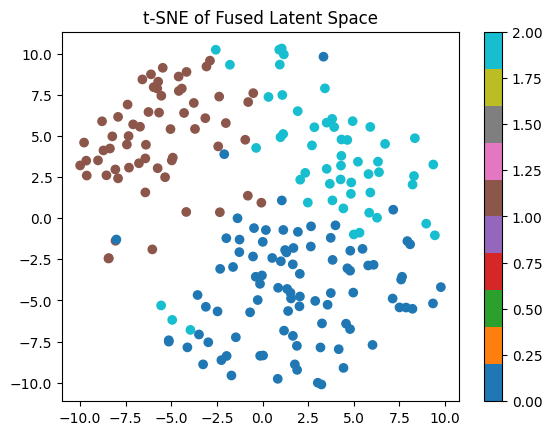

In [10]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
z_2d = tsne.fit_transform(z_fused.cpu().numpy())

plt.scatter(z_2d[:,0], z_2d[:,1], c=cluster_labels, cmap="tab10")
plt.colorbar()
plt.title("t-SNE of Fused Latent Space")
plt.show()


# Supervised Machine Learning Evaluation

Now let's train multiple classifiers on the fused features and evaluate with detailed metrics.

In [11]:
# Load subtype labels
labels_df = pd.read_csv("../NewDatasets/processed_labels_3Omics_FXS_OG.csv", index_col=0)

# Align labels with our data
common_samples = gene_df.index.intersection(labels_df.index)
print(f"Samples with labels: {len(common_samples)}")

# Filter data and labels to common samples
labels = labels_df.loc[common_samples].values.ravel()
z_fused_labeled = z_fused.cpu().numpy()

# If data was already aligned, we might need to reindex
if len(common_samples) < len(gene_df):
    # Refilter if needed
    gene_idx = gene_df.index.get_indexer(common_samples)
    z_fused_labeled = z_fused.cpu().numpy()[gene_idx]

print(f"Final data shape: {z_fused_labeled.shape}")
print(f"Labels shape: {labels.shape}")
print(f"Unique classes: {np.unique(labels)}")
print(f"Class distribution: {np.bincount(labels.astype(int))}")

Samples with labels: 205
Final data shape: (205, 192)
Labels shape: (205,)
Unique classes: [0 1 2 3]
Class distribution: [53 22 96 34]


Embeddings shape: (205, 192)
Labels shape: (205,)
Unique labels: [0 1 2 3]
Computing PCA...
Computing t-SNE...


C:\Users\shini\AppData\Local\Temp\ipykernel_2440\597130588.py:108: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 2].set_xticklabels(omic_contributions.keys(), rotation=45)


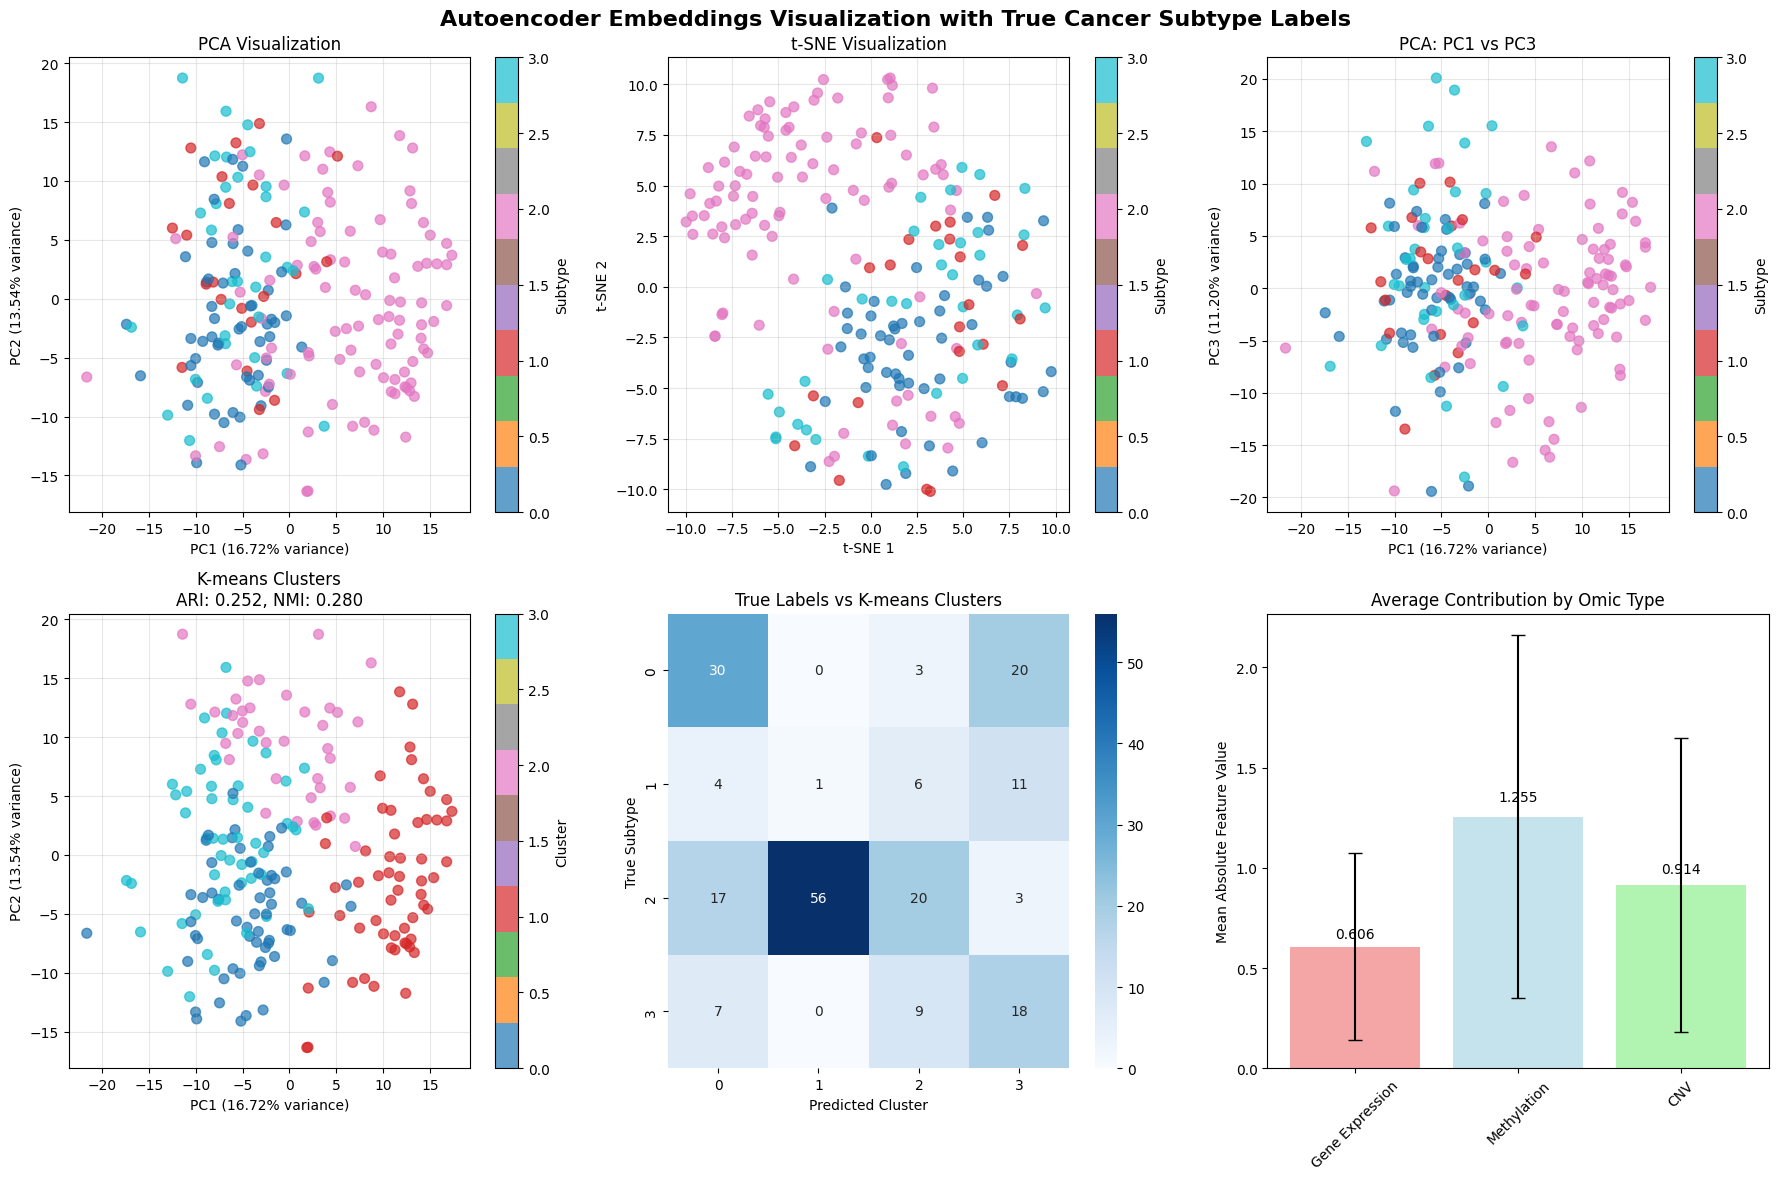

In [12]:
# Visualize embeddings with actual labels
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Get the fused embeddings and labels
embeddings = z_fused_labeled
true_labels = labels

print(f"Embeddings shape: {embeddings.shape}")
print(f"Labels shape: {true_labels.shape}")
print(f"Unique labels: {np.unique(true_labels)}")

# Create label names (assuming 0,1,2,3 are different cancer subtypes)
label_names = {0: 'Subtype 0', 1: 'Subtype 1', 2: 'Subtype 2', 3: 'Subtype 3'}
colored_labels = [label_names.get(int(label), f'Subtype {int(label)}') for label in true_labels]

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Autoencoder Embeddings Visualization with True Cancer Subtype Labels', fontsize=16, fontweight='bold')

# 1. PCA 2D visualization
print("Computing PCA...")
pca_2d = PCA(n_components=2, random_state=42)
embeddings_pca_2d = pca_2d.fit_transform(embeddings)

scatter1 = axes[0, 0].scatter(embeddings_pca_2d[:, 0], embeddings_pca_2d[:, 1], 
                             c=true_labels, cmap='tab10', alpha=0.7, s=50)
axes[0, 0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)')
axes[0, 0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)')
axes[0, 0].set_title('PCA Visualization')
axes[0, 0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0, 0], label='Subtype')

# 2. t-SNE 2D visualization
print("Computing t-SNE...")
tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_tsne_2d = tsne_2d.fit_transform(embeddings)

scatter2 = axes[0, 1].scatter(embeddings_tsne_2d[:, 0], embeddings_tsne_2d[:, 1], 
                             c=true_labels, cmap='tab10', alpha=0.7, s=50)
axes[0, 1].set_xlabel('t-SNE 1')
axes[0, 1].set_ylabel('t-SNE 2')
axes[0, 1].set_title('t-SNE Visualization')
axes[0, 1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[0, 1], label='Subtype')

# 3. PCA 3D to 2D projections (PC1 vs PC3)
pca_3d = PCA(n_components=3, random_state=42)
embeddings_pca_3d = pca_3d.fit_transform(embeddings)

scatter3 = axes[0, 2].scatter(embeddings_pca_3d[:, 0], embeddings_pca_3d[:, 2], 
                             c=true_labels, cmap='tab10', alpha=0.7, s=50)
axes[0, 2].set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%} variance)')
axes[0, 2].set_ylabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%} variance)')
axes[0, 2].set_title('PCA: PC1 vs PC3')
axes[0, 2].grid(True, alpha=0.3)
plt.colorbar(scatter3, ax=axes[0, 2], label='Subtype')

# 4. Cluster analysis comparison
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Perform K-means clustering
n_clusters = len(np.unique(true_labels))
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
predicted_clusters = kmeans.fit_predict(embeddings)

# Calculate clustering metrics
ari_score = adjusted_rand_score(true_labels, predicted_clusters)
nmi_score = normalized_mutual_info_score(true_labels, predicted_clusters)

scatter4 = axes[1, 0].scatter(embeddings_pca_2d[:, 0], embeddings_pca_2d[:, 1], 
                             c=predicted_clusters, cmap='tab10', alpha=0.7, s=50)
axes[1, 0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)')
axes[1, 0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)')
axes[1, 0].set_title(f'K-means Clusters\nARI: {ari_score:.3f}, NMI: {nmi_score:.3f}')
axes[1, 0].grid(True, alpha=0.3)
plt.colorbar(scatter4, ax=axes[1, 0], label='Cluster')

# 5. Side-by-side comparison: True vs Predicted
# Create a subplot for confusion-like comparison
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predicted_clusters)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_xlabel('Predicted Cluster')
axes[1, 1].set_ylabel('True Subtype')
axes[1, 1].set_title('True Labels vs K-means Clusters')

# 6. Feature importance heatmap (top features from each omic)
# Show contribution of each omic type to the fused representation
omic_contributions = {
    'Gene Expression': embeddings[:, :64].mean(axis=0),  # First 64 features from gene AE
    'Methylation': embeddings[:, 64:128].mean(axis=0),   # Next 64 features from meth AE  
    'CNV': embeddings[:, 128:192].mean(axis=0)           # Last 64 features from cnv AE
}

omic_means = [np.mean(np.abs(contrib)) for contrib in omic_contributions.values()]
omic_stds = [np.std(np.abs(contrib)) for contrib in omic_contributions.values()]

bars = axes[1, 2].bar(omic_contributions.keys(), omic_means, 
                      yerr=omic_stds, capsize=5, alpha=0.7, 
                      color=['lightcoral', 'lightblue', 'lightgreen'])
axes[1, 2].set_ylabel('Mean Absolute Feature Value')
axes[1, 2].set_title('Average Contribution by Omic Type')
axes[1, 2].set_xticklabels(omic_contributions.keys(), rotation=45)

# Add value labels on bars
for bar, mean_val in zip(bars, omic_means):
    axes[1, 2].text(bar.get_x() + bar.get_width()/2., bar.get_height() + bar.get_height()*0.05,
                    f'{mean_val:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [13]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, classification_report, confusion_matrix, roc_auc_score)
import seaborn as sns

# C-index calculation function
def concordance_index(y_true, y_pred_proba):
    """
    Calculate C-index (Concordance Index) for multi-class classification.
    Uses macro-averaged AUC for multi-class problems.
    """
    try:
        # For multi-class, use macro-averaged AUC as C-index
        c_index = roc_auc_score(y_true, y_pred_proba, multi_class='ovr', average='macro')
        return c_index
    except:
        return 0.0

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    z_fused_labeled, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Training class distribution: {np.bincount(y_train.astype(int))}")
print(f"Test class distribution: {np.bincount(y_test.astype(int))}")

Training set size: 164
Test set size: 41
Training class distribution: [42 18 77 27]
Test class distribution: [11  4 19  7]


In [14]:
# Define multiple classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=5),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42, probability=True),
    'SVM (Linear)': SVC(kernel='linear', random_state=42, probability=True),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42)
}

# Store results
results = []

print("Training and evaluating classifiers...\n")
print("="*80)

for name, clf in classifiers.items():
    # print(f"\n{name}:")
    # print("-"*80)
    
    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
    precision_micro = precision_score(y_test, y_pred, average='micro', zero_division=0)
    recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
    recall_micro = recall_score(y_test, y_pred, average='micro', zero_division=0)
    f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)
    f1_micro = f1_score(y_test, y_pred, average='micro', zero_division=0)
    c_index = concordance_index(y_test, y_pred_proba)
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision (Macro)': precision_macro,
        'Precision (Micro)': precision_micro,
        'Recall (Macro)': recall_macro,
        'Recall (Micro)': recall_micro,
        'F1 (Macro)': f1_macro,
        'F1 (Micro)': f1_micro,
        'C-Index': c_index
    })
    
    # Print metrics
    # print(f"Accuracy:           {accuracy:.4f}")
    # print(f"Precision (Macro):  {precision_macro:.4f}")
    # print(f"Precision (Micro):  {precision_micro:.4f}")
    # print(f"Recall (Macro):     {recall_macro:.4f}")
    # print(f"Recall (Micro):     {recall_micro:.4f}")
    # print(f"F1-Score (Macro):   {f1_macro:.4f}")
    # print(f"F1-Score (Micro):   {f1_micro:.4f}")



Training and evaluating classifiers...



f:\BRACU\Thesis Thingy[T2510589]\DATASET 2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [15]:
# Native Autoencoder-based Classifiers
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class AEClassifier(nn.Module):
    def __init__(self, input_dim, num_classes, hidden_dims=[128, 64], dropout=0.3):
        super(AEClassifier, self).__init__()
        layers = []
        
        # Input layer
        layers.append(nn.Linear(input_dim, hidden_dims[0]))
        layers.append(nn.BatchNorm1d(hidden_dims[0]))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(dropout))
        
        # Hidden layers
        for i in range(len(hidden_dims) - 1):
            layers.append(nn.Linear(hidden_dims[i], hidden_dims[i+1]))
            layers.append(nn.BatchNorm1d(hidden_dims[i+1]))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
        
        # Output layer
        layers.append(nn.Linear(hidden_dims[-1], num_classes))
        
        self.network = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.network(x)

def train_ae_classifier(model, X_train, y_train, X_test, y_test, epochs=200, patience=15):
    """Train AE-based classifier with early stopping"""
    # Convert to tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)
    
    # Create data loaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    
    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=10, factor=0.5)
    
    best_test_acc = 0
    patience_counter = 0
    best_model_state = None
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_loss = 0
        train_correct = 0
        train_total = 0
        
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_total += batch_y.size(0)
            train_correct += (predicted == batch_y).sum().item()
        
        # Testing
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test_tensor)
            test_loss = criterion(test_outputs, y_test_tensor)
            _, test_predicted = torch.max(test_outputs.data, 1)
            test_acc = (test_predicted == y_test_tensor).sum().item() / len(y_test_tensor)
        
        train_acc = train_correct / train_total
        scheduler.step(test_loss)
        
        if (epoch + 1) % 50 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
        
        # Early stopping
        if test_acc > best_test_acc:
            best_test_acc = test_acc
            best_model_state = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break
    
    # Restore best model
    if best_model_state:
        model.load_state_dict(best_model_state)
    
    return model

# Train different AE-based classifier architectures
num_classes = len(np.unique(labels))
input_dim = z_fused_labeled.shape[1]

print("Training Native Autoencoder-based Classifiers...")
print("-" * 50)

# Shallow AE Classifier
shallow_ae = AEClassifier(input_dim, num_classes, hidden_dims=[64], dropout=0.2).to(device)
print("Training Shallow AE Classifier...")
shallow_ae = train_ae_classifier(shallow_ae, X_train, y_train, X_test, y_test)

# Deep AE Classifier
deep_ae = AEClassifier(input_dim, num_classes, hidden_dims=[256, 128, 64], dropout=0.3).to(device)
print("\nTraining Deep AE Classifier...")
deep_ae = train_ae_classifier(deep_ae, X_train, y_train, X_test, y_test)

def evaluate_ae_classifier(model, X_test, y_test, model_name):
    """Evaluate AE-based classifier and return metrics"""
    import torch.nn.functional as F
    model.eval()
    with torch.no_grad():
        X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
        outputs = model(X_test_tensor)
        probs = F.softmax(outputs, dim=1).cpu().numpy()
        _, predicted = torch.max(outputs.data, 1)
        y_pred = predicted.cpu().numpy()
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    c_index = roc_auc_score(y_test, probs, multi_class='ovr', average='macro')
    precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
    precision_micro = precision_score(y_test, y_pred, average='micro', zero_division=0)
    recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
    recall_micro = recall_score(y_test, y_pred, average='micro', zero_division=0)
    f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)
    f1_micro = f1_score(y_test, y_pred, average='micro', zero_division=0)
    
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision (Macro)': precision_macro,
        'Precision (Micro)': precision_micro,
        'Recall (Macro)': recall_macro,
        'Recall (Micro)': recall_micro,
        'F1 (Macro)': f1_macro,
        'F1 (Micro)': f1_micro,
        'C-Index': c_index
    }

# Evaluate all AE-based models
ae_results = []
ae_results.append(evaluate_ae_classifier(shallow_ae, X_test, y_test, "Shallow AE"))
ae_results.append(evaluate_ae_classifier(deep_ae, X_test, y_test, "Deep AE"))

print("\n" + "="*80)
print("NATIVE AUTOENCODER-BASED CLASSIFICATION RESULTS")
print("="*80)
ae_results_df = pd.DataFrame(ae_results)
print(ae_results_df.to_string(index=False))


Training Native Autoencoder-based Classifiers...
--------------------------------------------------
Training Shallow AE Classifier...
Early stopping at epoch 34

Training Deep AE Classifier...
Early stopping at epoch 19

NATIVE AUTOENCODER-BASED CLASSIFICATION RESULTS
     Model  Accuracy  Precision (Macro)  Precision (Micro)  Recall (Macro)  Recall (Micro)  F1 (Macro)  F1 (Micro)  C-Index
Shallow AE  0.804878           0.825000           0.804878        0.695446        0.804878    0.691614    0.804878 0.918489
   Deep AE  0.804878           0.591388           0.804878        0.655673        0.804878    0.617858    0.804878 0.931438


In [16]:
# Combine Traditional ML and Native AE Results
print("\n" + "="*80)
print("COMBINED RESULTS: TRADITIONAL ML vs NATIVE AUTOENCODER-BASED CLASSIFIERS")
print("="*80)

# Combine all results
all_results = results + ae_results
combined_df = pd.DataFrame(all_results)
combined_df = combined_df.sort_values('Accuracy', ascending=False)

print(combined_df.to_string(index=False))



COMBINED RESULTS: TRADITIONAL ML vs NATIVE AUTOENCODER-BASED CLASSIFIERS
              Model  Accuracy  Precision (Macro)  Precision (Micro)  Recall (Macro)  Recall (Micro)  F1 (Macro)  F1 (Micro)  C-Index
Logistic Regression  0.829268           0.840909           0.829268        0.718173        0.829268    0.714455    0.829268 0.934064
      Random Forest  0.804878           0.696429           0.804878        0.669472        0.804878    0.669434    0.804878 0.916766
         Shallow AE  0.804878           0.825000           0.804878        0.695446        0.804878    0.691614    0.804878 0.918489
            Deep AE  0.804878           0.591388           0.804878        0.655673        0.804878    0.617858    0.804878 0.931438
          SVM (RBF)  0.780488           0.546429           0.780488        0.606972        0.780488    0.573626    0.780488 0.899993
  Gradient Boosting  0.756098           0.755952           0.756098        0.650803        0.756098    0.680964    0.756098 0.92

In [17]:
# Enhanced Results Table with C-Index Highlighted
print("\n" + "="*100)
print("COMPREHENSIVE MODEL COMPARISON WITH C-INDEX SCORES")
print("="*100)

# Sort by C-Index for additional perspective
combined_df_c_index = combined_df.sort_values('C-Index', ascending=False)

print("\n🏆 RANKING BY C-INDEX (Discriminative Ability):")
print("-"*100)
print(combined_df_c_index[['Model', 'Accuracy', 'F1 (Macro)', 'C-Index']].to_string(index=False))

print("\n📊 DETAILED METRICS TABLE:")
print("-"*100)
print(combined_df.to_string(index=False))



COMPREHENSIVE MODEL COMPARISON WITH C-INDEX SCORES

🏆 RANKING BY C-INDEX (Discriminative Ability):
----------------------------------------------------------------------------------------------------
              Model  Accuracy  F1 (Macro)  C-Index
Logistic Regression  0.829268    0.714455 0.934064
            Deep AE  0.804878    0.617858 0.931438
       SVM (Linear)  0.731707    0.621662 0.920591
  Gradient Boosting  0.756098    0.680964 0.920542
         Shallow AE  0.804878    0.691614 0.918489
      Random Forest  0.804878    0.669434 0.916766
          SVM (RBF)  0.780488    0.573626 0.899993
        Naive Bayes  0.731707    0.646929 0.872660
K-Nearest Neighbors  0.707317    0.529240 0.823181
      Decision Tree  0.609756    0.502521 0.690878

📊 DETAILED METRICS TABLE:
----------------------------------------------------------------------------------------------------
              Model  Accuracy  Precision (Macro)  Precision (Micro)  Recall (Macro)  Recall (Micro)  F1 (Macro

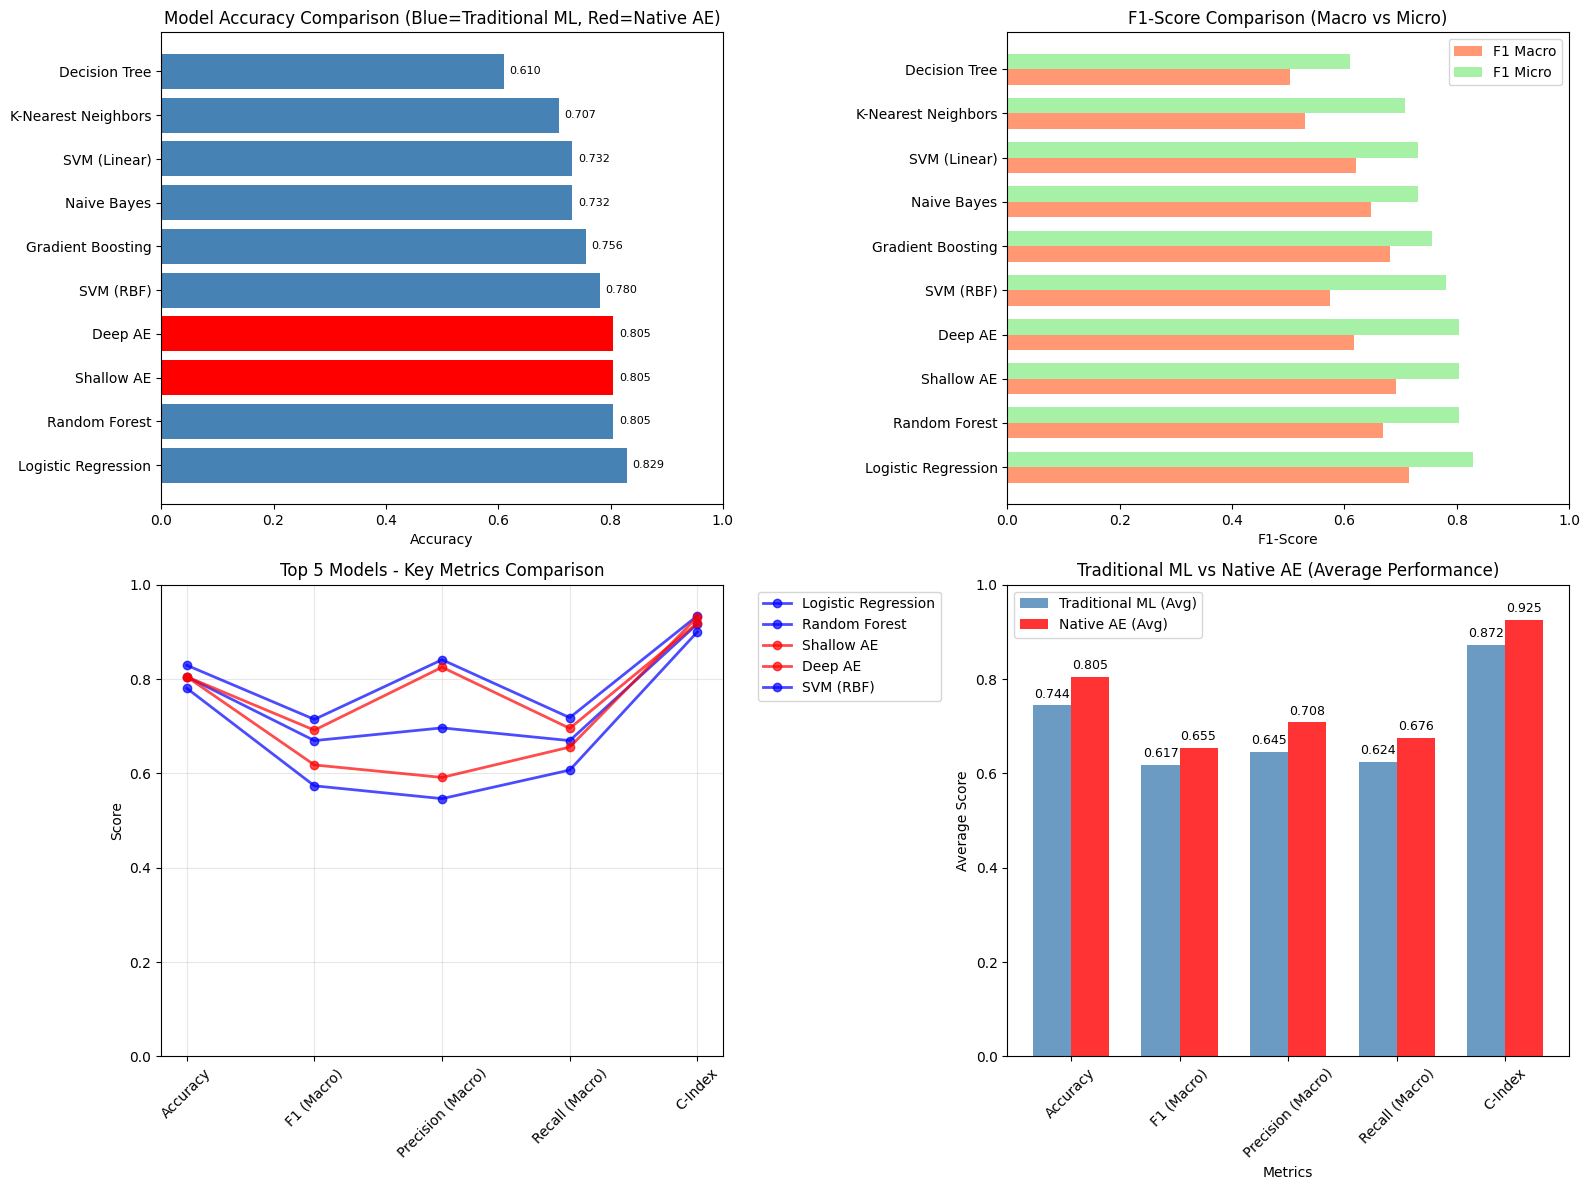

In [18]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Separate traditional ML and AE results for color coding (ensure C-Index column exists)
traditional_ml = combined_df[~combined_df['Model'].str.contains('AE')].copy()
native_ae = combined_df[combined_df['Model'].str.contains('AE')].copy()

# Plot 1: Accuracy comparison with color coding
colors = ['steelblue' if 'AE' not in model else 'red' for model in combined_df['Model']]
bars1 = axes[0, 0].barh(combined_df['Model'], combined_df['Accuracy'], color=colors)
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].set_title('Model Accuracy Comparison (Blue=Traditional ML, Red=Native AE)')
axes[0, 0].set_xlim([0, 1])

# Add accuracy values on bars
for i, (bar, acc) in enumerate(zip(bars1, combined_df['Accuracy'])):
    axes[0, 0].text(acc + 0.01, bar.get_y() + bar.get_height()/2, 
                    f'{acc:.3f}', va='center', fontsize=8)

# Plot 2: F1-Score comparison (Macro and Micro)
x = np.arange(len(combined_df))
width = 0.35
bars2 = axes[0, 1].barh(x - width/2, combined_df['F1 (Macro)'], width, 
                        label='F1 Macro', color='coral', alpha=0.8)
bars3 = axes[0, 1].barh(x + width/2, combined_df['F1 (Micro)'], width, 
                        label='F1 Micro', color='lightgreen', alpha=0.8)
axes[0, 1].set_yticks(x)
axes[0, 1].set_yticklabels(combined_df['Model'])
axes[0, 1].set_xlabel('F1-Score')
axes[0, 1].set_title('F1-Score Comparison (Macro vs Micro)')
axes[0, 1].legend()
axes[0, 1].set_xlim([0, 1])

# Plot 3: Top 5 models performance radar chart style
top_5 = combined_df.head(5)
metrics = ['Accuracy', 'F1 (Macro)', 'Precision (Macro)', 'Recall (Macro)']
if 'C-Index' in combined_df.columns:
    metrics.append('C-Index')
x_pos = np.arange(len(metrics))

for i, (_, row) in enumerate(top_5.iterrows()):
    values = [row[metric] for metric in metrics]
    color = 'red' if 'AE' in row['Model'] else 'blue'
    axes[1, 0].plot(x_pos, values, 'o-', label=row['Model'], 
                    linewidth=2, markersize=6, alpha=0.7, color=color)

axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(metrics, rotation=45)
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_title('Top 5 Models - Key Metrics Comparison')
axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 0].set_ylim([0, 1])
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Model type performance summary
# Ensure C-Index column exists before calculating averages
available_metrics = ['Accuracy', 'F1 (Macro)', 'Precision (Macro)', 'Recall (Macro)']
if 'C-Index' in combined_df.columns:
    available_metrics.append('C-Index')

traditional_avg = traditional_ml[available_metrics].mean()
ae_avg = native_ae[available_metrics].mean()

categories = available_metrics
x_pos = np.arange(len(categories))
width = 0.35

bars4 = axes[1, 1].bar(x_pos - width/2, traditional_avg, width, 
                       label='Traditional ML (Avg)', color='steelblue', alpha=0.8)
bars5 = axes[1, 1].bar(x_pos + width/2, ae_avg, width, 
                       label='Native AE (Avg)', color='red', alpha=0.8)

axes[1, 1].set_xlabel('Metrics')
axes[1, 1].set_ylabel('Average Score')
axes[1, 1].set_title('Traditional ML vs Native AE (Average Performance)')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(categories, rotation=45)
axes[1, 1].legend()
axes[1, 1].set_ylim([0, 1])

# Add value labels on bars
for bars in [bars4, bars5]:
    for bar in bars:
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\n" + "="*80)

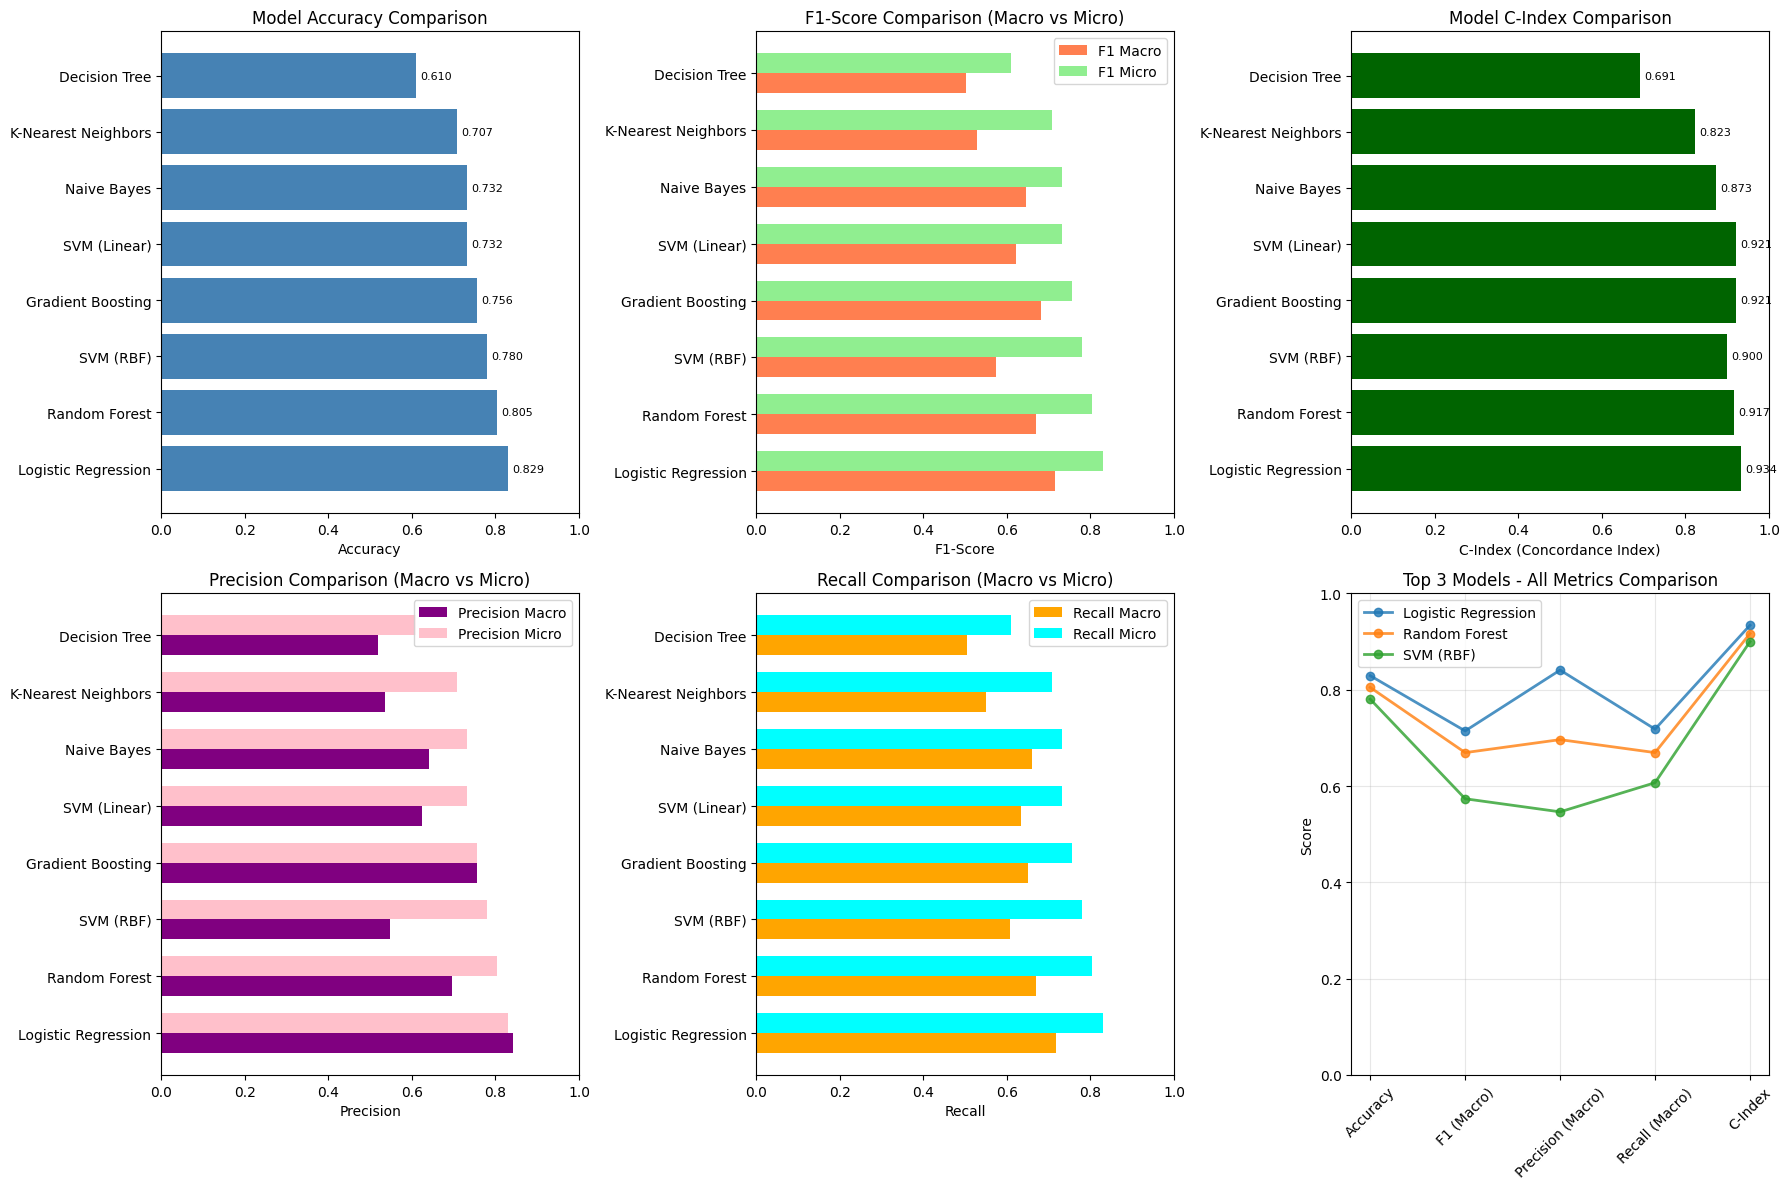

In [19]:
# Create a summary dataframe
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False)

# Visualize results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Accuracy comparison
bars1 = axes[0, 0].barh(results_df['Model'], results_df['Accuracy'], color='steelblue')
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].set_title('Model Accuracy Comparison')
axes[0, 0].set_xlim([0, 1])
# Add accuracy values on bars
for bar, acc in zip(bars1, results_df['Accuracy']):
    axes[0, 0].text(acc + 0.01, bar.get_y() + bar.get_height()/2, f'{acc:.3f}', va='center', fontsize=8)

# Plot 2: F1-Score comparison (Macro and Micro)
x = np.arange(len(results_df))
width = 0.35
axes[0, 1].barh(x - width/2, results_df['F1 (Macro)'], width, label='F1 Macro', color='coral')
axes[0, 1].barh(x + width/2, results_df['F1 (Micro)'], width, label='F1 Micro', color='lightgreen')
axes[0, 1].set_yticks(x)
axes[0, 1].set_yticklabels(results_df['Model'])
axes[0, 1].set_xlabel('F1-Score')
axes[0, 1].set_title('F1-Score Comparison (Macro vs Micro)')
axes[0, 1].legend()
axes[0, 1].set_xlim([0, 1])

# Plot 3: C-Index comparison
bars3 = axes[0, 2].barh(results_df['Model'], results_df['C-Index'], color='darkgreen')
axes[0, 2].set_xlabel('C-Index (Concordance Index)')
axes[0, 2].set_title('Model C-Index Comparison')
axes[0, 2].set_xlim([0, 1])
# Add C-index values on bars
for bar, c_idx in zip(bars3, results_df['C-Index']):
    axes[0, 2].text(c_idx + 0.01, bar.get_y() + bar.get_height()/2, f'{c_idx:.3f}', va='center', fontsize=8)

# Plot 4: Precision comparison
axes[1, 0].barh(x - width/2, results_df['Precision (Macro)'], width, label='Precision Macro', color='purple')
axes[1, 0].barh(x + width/2, results_df['Precision (Micro)'], width, label='Precision Micro', color='pink')
axes[1, 0].set_yticks(x)
axes[1, 0].set_yticklabels(results_df['Model'])
axes[1, 0].set_xlabel('Precision')
axes[1, 0].set_title('Precision Comparison (Macro vs Micro)')
axes[1, 0].legend()
axes[1, 0].set_xlim([0, 1])

# Plot 5: Recall comparison
axes[1, 1].barh(x - width/2, results_df['Recall (Macro)'], width, label='Recall Macro', color='orange')
axes[1, 1].barh(x + width/2, results_df['Recall (Micro)'], width, label='Recall Micro', color='cyan')
axes[1, 1].set_yticks(x)
axes[1, 1].set_yticklabels(results_df['Model'])
axes[1, 1].set_xlabel('Recall')
axes[1, 1].set_title('Recall Comparison (Macro vs Micro)')
axes[1, 1].legend()
axes[1, 1].set_xlim([0, 1])

# Plot 6: Combined metrics radar chart for top 3 models
top_3 = results_df.head(3)
metrics_radar = ['Accuracy', 'F1 (Macro)', 'Precision (Macro)', 'Recall (Macro)', 'C-Index']
x_pos = np.arange(len(metrics_radar))

for i, (_, row) in enumerate(top_3.iterrows()):
    values = [row[metric] for metric in metrics_radar]
    axes[1, 2].plot(x_pos, values, 'o-', label=row['Model'], linewidth=2, markersize=6, alpha=0.8)

axes[1, 2].set_xticks(x_pos)
axes[1, 2].set_xticklabels(metrics_radar, rotation=45)
axes[1, 2].set_ylabel('Score')
axes[1, 2].set_title('Top 3 Models - All Metrics Comparison')
axes[1, 2].legend()
axes[1, 2].set_ylim([0, 1])
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


DETAILED REPORT FOR MODEL: Random Forest

Classification Report (per-class metrics):
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.7143    0.9091    0.8000        11
           1     0.5000    0.2500    0.3333         4
           2     1.0000    0.9474    0.9730        19
           3     0.5714    0.5714    0.5714         7

    accuracy                         0.8049        41
   macro avg     0.6964    0.6695    0.6694        41
weighted avg     0.8014    0.8049    0.7956        41



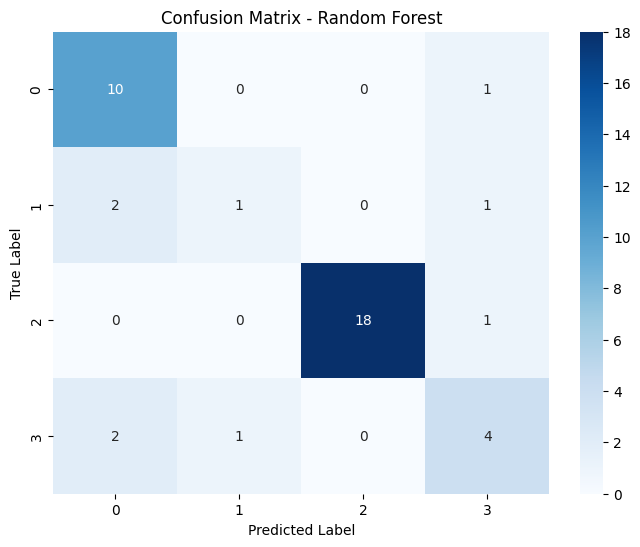


Confusion Matrix:
[[10  0  0  1]
 [ 2  1  0  1]
 [ 0  0 18  1]
 [ 2  1  0  4]]

DETAILED REPORT FOR MODEL: Gradient Boosting

Classification Report (per-class metrics):
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.6667    0.7273    0.6957        11
           1     1.0000    0.5000    0.6667         4
           2     0.8571    0.9474    0.9000        19
           3     0.5000    0.4286    0.4615         7

    accuracy                         0.7561        41
   macro avg     0.7560    0.6508    0.6810        41
weighted avg     0.7590    0.7561    0.7476        41



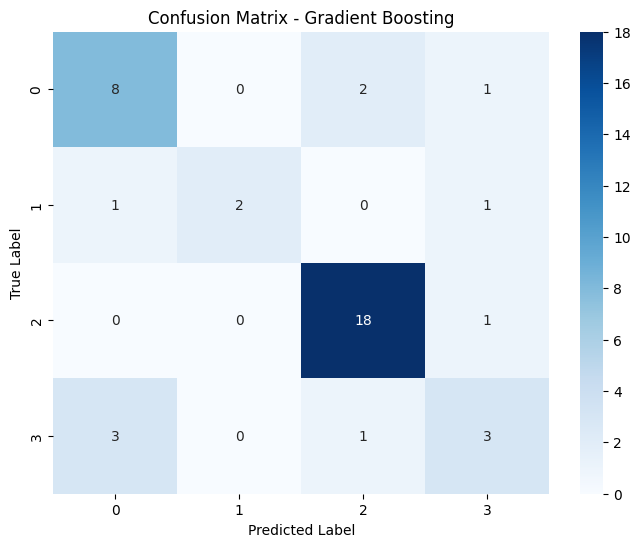


Confusion Matrix:
[[ 8  0  2  1]
 [ 1  2  0  1]
 [ 0  0 18  1]
 [ 3  0  1  3]]

DETAILED REPORT FOR MODEL: SVM (RBF)

Classification Report (per-class metrics):
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.7143    0.9091    0.8000        11
           1     0.0000    0.0000    0.0000         4
           2     0.9000    0.9474    0.9231        19
           3     0.5714    0.5714    0.5714         7

    accuracy                         0.7805        41
   macro avg     0.5464    0.6070    0.5736        41
weighted avg     0.7063    0.7805    0.7400        41



f:\BRACU\Thesis Thingy[T2510589]\DATASET 2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
f:\BRACU\Thesis Thingy[T2510589]\DATASET 2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
f:\BRACU\Thesis Thingy[T2510589]\DATASET 2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

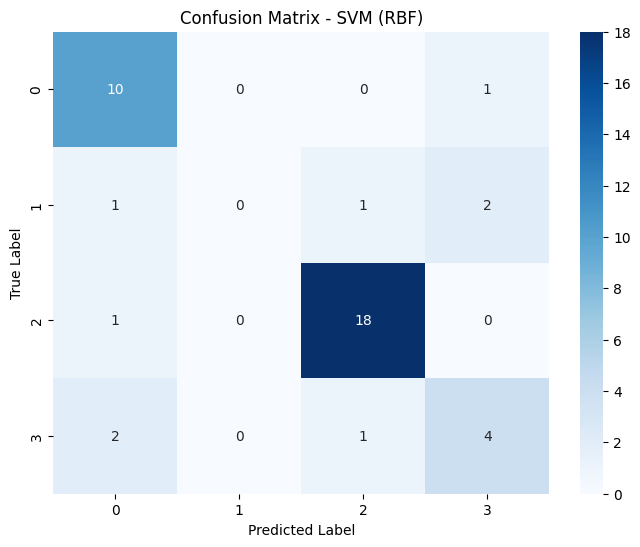


Confusion Matrix:
[[10  0  0  1]
 [ 1  0  1  2]
 [ 1  0 18  0]
 [ 2  0  1  4]]

DETAILED REPORT FOR MODEL: SVM (Linear)

Classification Report (per-class metrics):
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.8000    0.7273    0.7619        11
           1     0.2000    0.2500    0.2222         4
           2     1.0000    0.8421    0.9143        19
           3     0.5000    0.7143    0.5882         7

    accuracy                         0.7317        41
   macro avg     0.6250    0.6334    0.6217        41
weighted avg     0.7829    0.7317    0.7502        41



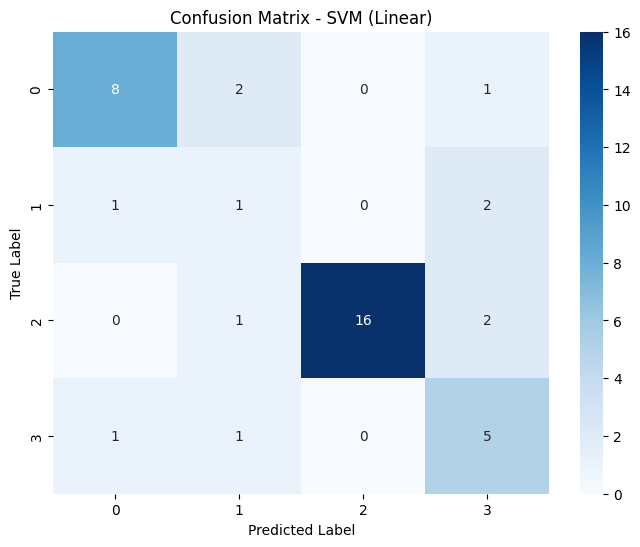


Confusion Matrix:
[[ 8  2  0  1]
 [ 1  1  0  2]
 [ 0  1 16  2]
 [ 1  1  0  5]]

DETAILED REPORT FOR MODEL: Logistic Regression

Classification Report (per-class metrics):
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.8182    0.8182    0.8182        11
           1     1.0000    0.2500    0.4000         4
           2     1.0000    0.9474    0.9730        19
           3     0.5455    0.8571    0.6667         7

    accuracy                         0.8293        41
   macro avg     0.8409    0.7182    0.7145        41
weighted avg     0.8736    0.8293    0.8232        41



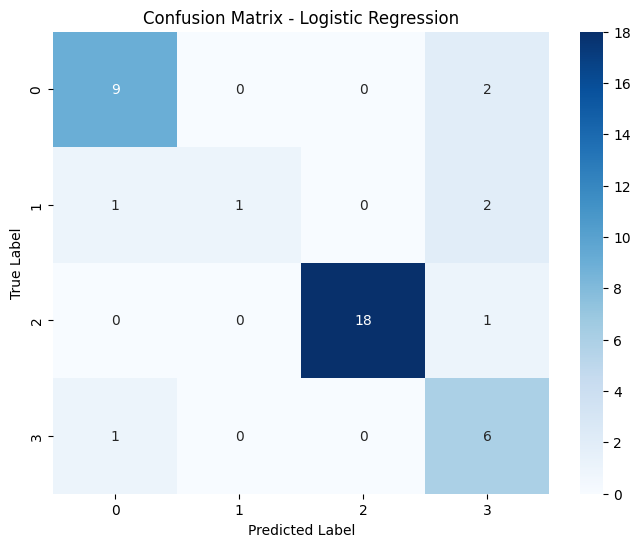


Confusion Matrix:
[[ 9  0  0  2]
 [ 1  1  0  2]
 [ 0  0 18  1]
 [ 1  0  0  6]]

DETAILED REPORT FOR MODEL: K-Nearest Neighbors

Classification Report (per-class metrics):
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.7143    0.9091    0.8000        11
           1     0.2000    0.2500    0.2222         4
           2     0.8947    0.8947    0.8947        19
           3     0.3333    0.1429    0.2000         7

    accuracy                         0.7073        41
   macro avg     0.5356    0.5492    0.5292        41
weighted avg     0.6827    0.7073    0.6851        41



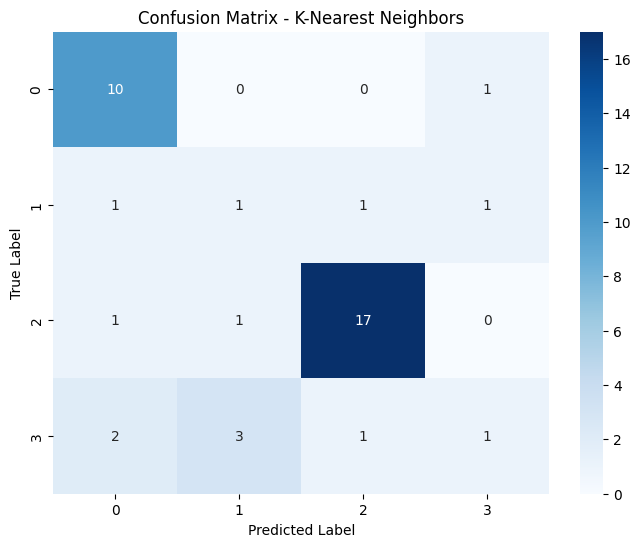


Confusion Matrix:
[[10  0  0  1]
 [ 1  1  1  1]
 [ 1  1 17  0]
 [ 2  3  1  1]]

DETAILED REPORT FOR MODEL: Naive Bayes

Classification Report (per-class metrics):
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.6667    0.7273    0.6957        11
           1     0.4000    0.5000    0.4444         4
           2     1.0000    0.8421    0.9143        19
           3     0.5000    0.5714    0.5333         7

    accuracy                         0.7317        41
   macro avg     0.6417    0.6602    0.6469        41
weighted avg     0.7667    0.7317    0.7447        41



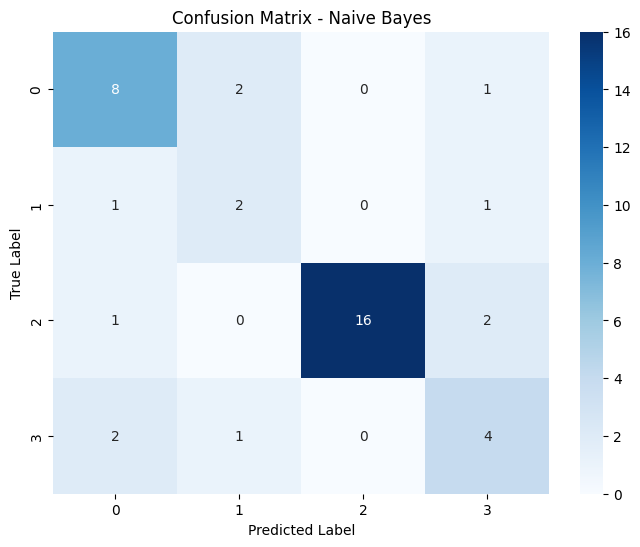


Confusion Matrix:
[[ 8  2  0  1]
 [ 1  2  0  1]
 [ 1  0 16  2]
 [ 2  1  0  4]]

DETAILED REPORT FOR MODEL: Decision Tree

Classification Report (per-class metrics):
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.6667    0.5455    0.6000        11
           1     0.1667    0.2500    0.2000         4
           2     0.9375    0.7895    0.8571        19
           3     0.3000    0.4286    0.3529         7

    accuracy                         0.6098        41
   macro avg     0.5177    0.5034    0.5025        41
weighted avg     0.6808    0.6098    0.6380        41



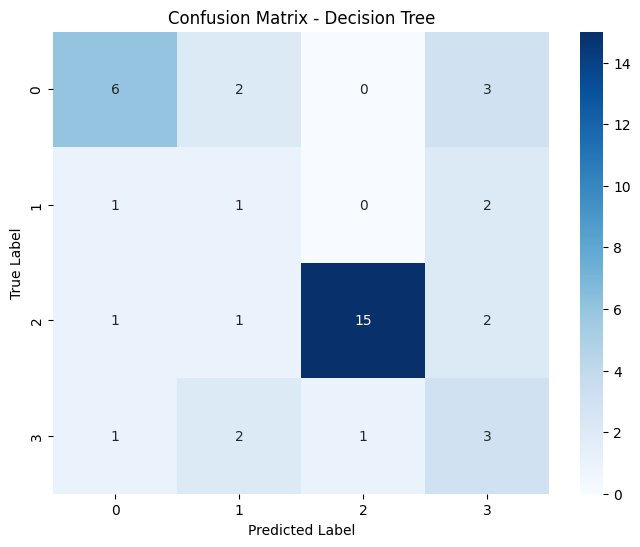


Confusion Matrix:
[[ 6  2  0  3]
 [ 1  1  0  2]
 [ 1  1 15  2]
 [ 1  2  1  3]]


In [20]:
for name, clf in classifiers.items():
    print(f"\n{'='*80}")
    print(f"DETAILED REPORT FOR MODEL: {name}")
    print(f"{'='*80}\n")
    
    y_pred = clf.predict(X_test)
    
    print("Classification Report (per-class metrics):")
    print("-"*80)
    print(classification_report(y_test, y_pred, digits=4))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    print(f"\nConfusion Matrix:")
    print(cm)


In [21]:
# Cross-validation for the top 3 models
print(f"\n{'='*80}")
print("CROSS-VALIDATION RESULTS (5-Fold Stratified)")
print(f"{'='*80}\n")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i, (name, clf) in enumerate(list(classifiers.items())[:3]):  # Top 3 models
    scores = cross_val_score(clf, z_fused_labeled, labels, cv=cv, scoring='accuracy')
    f1_scores = cross_val_score(clf, z_fused_labeled, labels, cv=cv, scoring='f1_macro')
    roc_scores = cross_val_score(clf, z_fused_labeled, labels, cv=cv, scoring='roc_auc_ovr')
    
    print(f"{name}:")
    print(f"  Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")
    print(f"  F1-Macro: {f1_scores.mean():.4f} (+/- {f1_scores.std():.4f})")
    print(f"  C-Index:  {roc_scores.mean():.4f} (+/- {roc_scores.std():.4f})")
    print()


CROSS-VALIDATION RESULTS (5-Fold Stratified)

Random Forest:
  Accuracy: 0.7854 (+/- 0.0183)
  F1-Macro: 0.6769 (+/- 0.0170)
  C-Index:  0.9029 (+/- 0.0306)

Gradient Boosting:
  Accuracy: 0.6780 (+/- 0.0605)
  F1-Macro: 0.5766 (+/- 0.0705)
  C-Index:  0.8659 (+/- 0.0422)

SVM (RBF):
  Accuracy: 0.6976 (+/- 0.0683)
  F1-Macro: 0.5015 (+/- 0.0629)
  C-Index:  0.8673 (+/- 0.0381)



# Survival Analysis Visualization

Now let's perform survival analysis to understand the relationship between cancer subtypes (predicted by our model) and patient outcomes.

In [23]:
# Load and prepare survival data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test, multivariate_logrank_test
from lifelines.plotting import plot_lifetimes
import warnings
warnings.filterwarnings('ignore')

# Load survival data
survival_df = pd.read_csv("../TCGA-SARC.survival.tsv", sep='\t')
print(f"Survival data shape: {survival_df.shape}")
print(f"Survival data columns: {survival_df.columns.tolist()}")
print(f"Sample survival data:")
print(survival_df.head())

# Check for missing values
print(f"\nMissing values:")
print(survival_df.isnull().sum())

# Basic statistics
print(f"\nSurvival statistics:")
print(f"OS.time range: {survival_df['OS.time'].min():.1f} - {survival_df['OS.time'].max():.1f} months")
print(f"Event rate (deaths): {survival_df['OS'].mean():.3f} ({survival_df['OS'].sum()} out of {len(survival_df)})")
print(f"Median follow-up time: {survival_df['OS.time'].median():.1f} months")

Survival data shape: (269, 4)
Survival data columns: ['sample', 'OS.time', 'OS', '_PATIENT']
Sample survival data:
             sample  OS.time  OS      _PATIENT
0  TCGA-MB-A5YA-01A     15.0   0  TCGA-MB-A5YA
1  TCGA-3R-A8YX-01A     17.0   1  TCGA-3R-A8YX
2  TCGA-HS-A5N8-01A     22.0   1  TCGA-HS-A5N8
3  TCGA-RN-A68Q-01A     22.0   0  TCGA-RN-A68Q
4  TCGA-X6-A7W8-01A     24.0   1  TCGA-X6-A7W8

Missing values:
sample      0
OS.time     0
OS          0
_PATIENT    0
dtype: int64

Survival statistics:
OS.time range: 15.0 - 5723.0 months
Event rate (deaths): 0.379 (102 out of 269)
Median follow-up time: 959.0 months


In [24]:
# Get predictions from the best model for survival analysis
best_model_name = results_df.iloc[0]['Model']
best_clf = classifiers[best_model_name]

# Get predictions for all samples (not just test set)
all_predictions = best_clf.predict(z_fused_labeled)
all_prediction_probs = best_clf.predict_proba(z_fused_labeled)

# Create a mapping of sample indices to predictions
# Assuming gene_df.index contains the sample IDs that match survival data
sample_ids = gene_df.index.tolist()
predictions_df = pd.DataFrame({
    'sample': sample_ids,
    'predicted_subtype': all_predictions,
    'subtype_0_prob': all_prediction_probs[:, 0],
    'subtype_1_prob': all_prediction_probs[:, 1] if all_prediction_probs.shape[1] > 1 else 0,
    'subtype_2_prob': all_prediction_probs[:, 2] if all_prediction_probs.shape[1] > 2 else 0,
    'subtype_3_prob': all_prediction_probs[:, 3] if all_prediction_probs.shape[1] > 3 else 0,
    'max_prob': np.max(all_prediction_probs, axis=1)  # Confidence score
})

print(f"Predictions shape: {predictions_df.shape}")
print(f"Predicted subtypes distribution:")
print(predictions_df['predicted_subtype'].value_counts().sort_index())
print(f"\nSample predictions:")
print(predictions_df.head())

Predictions shape: (205, 7)
Predicted subtypes distribution:
predicted_subtype
0    53
1    19
2    94
3    39
Name: count, dtype: int64

Sample predictions:
             sample  predicted_subtype  subtype_0_prob  subtype_1_prob  \
0  TCGA-3B-A9HV-01A                  2        0.000165        0.000324   
1  TCGA-HS-A5N7-01A                  2        0.000243        0.018048   
2  TCGA-HB-A2OT-01A                  3        0.009191        0.059419   
3  TCGA-QQ-A5VD-01A                  2        0.000998        0.001068   
4  TCGA-DX-A2IZ-01A                  0        0.804239        0.005432   

   subtype_2_prob  subtype_3_prob  max_prob  
0        0.999509    1.945440e-06  0.999509  
1        0.981708    4.521218e-07  0.981708  
2        0.000450    9.309390e-01  0.930939  
3        0.997722    2.119583e-04  0.997722  
4        0.190329    2.618674e-08  0.804239  


In [25]:
# Merge survival data with predictions
# First, let's align the sample names properly
survival_df['sample_clean'] = survival_df['sample'].str.replace('-01A', '', regex=False)
predictions_df['sample_clean'] = predictions_df['sample'].str.replace('-01A', '', regex=False)

# Merge on cleaned sample names
survival_analysis_df = pd.merge(
    survival_df, 
    predictions_df, 
    left_on='sample_clean', 
    right_on='sample_clean', 
    how='inner'
)

print(f"Merged data shape: {survival_analysis_df.shape}")
print(f"Successfully matched {len(survival_analysis_df)} samples")

if len(survival_analysis_df) == 0:
    print("No matching samples found. Trying direct merge...")
    # Try direct merge without cleaning
    survival_analysis_df = pd.merge(
        survival_df, 
        predictions_df, 
        left_on='sample', 
        right_on='sample', 
        how='inner'
    )
    print(f"Direct merge result: {survival_analysis_df.shape}")

if len(survival_analysis_df) > 0:
    # Clean up column names - pandas creates sample_x and sample_y during merge
    if 'sample_x' in survival_analysis_df.columns:
        survival_analysis_df = survival_analysis_df.rename(columns={'sample_x': 'sample'})
        if 'sample_y' in survival_analysis_df.columns:
            survival_analysis_df = survival_analysis_df.drop(columns=['sample_y'])
    
    print(f"\nSubtype distribution in survival cohort:")
    print(survival_analysis_df['predicted_subtype'].value_counts().sort_index())
    print(f"\nSample of merged data:")
    print(survival_analysis_df[['sample', 'OS.time', 'OS', 'predicted_subtype', 'max_prob']].head())
else:
    print("Warning: No samples could be matched between survival and prediction data")
    print("Sample names in survival data:", survival_df['sample'].head().tolist())
    print("Sample names in prediction data:", predictions_df['sample'].head().tolist())

Merged data shape: (203, 12)
Successfully matched 203 samples

Subtype distribution in survival cohort:
predicted_subtype
0    53
1    19
2    93
3    38
Name: count, dtype: int64

Sample of merged data:
             sample  OS.time  OS  predicted_subtype  max_prob
0  TCGA-MB-A5YA-01A     15.0   0                  2  0.998819
1  TCGA-3R-A8YX-01A     17.0   1                  3  0.615018
2  TCGA-HS-A5N8-01A     22.0   1                  2  0.914821
3  TCGA-X6-A7W8-01A     24.0   1                  1  0.522491
4  TCGA-JV-A5VF-01A     32.0   1                  2  0.548032


In [26]:
# Debug: Check the columns in survival_analysis_df
print("Columns in survival_analysis_df:")
print(survival_analysis_df.columns.tolist())
print("\nDataFrame info:")
print(survival_analysis_df.info())
print("\nFirst few rows:")
print(survival_analysis_df.head())

Columns in survival_analysis_df:
['sample', 'OS.time', 'OS', '_PATIENT', 'sample_clean', 'predicted_subtype', 'subtype_0_prob', 'subtype_1_prob', 'subtype_2_prob', 'subtype_3_prob', 'max_prob']

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sample             203 non-null    object 
 1   OS.time            203 non-null    float64
 2   OS                 203 non-null    int64  
 3   _PATIENT           203 non-null    object 
 4   sample_clean       203 non-null    object 
 5   predicted_subtype  203 non-null    int64  
 6   subtype_0_prob     203 non-null    float64
 7   subtype_1_prob     203 non-null    float64
 8   subtype_2_prob     203 non-null    float64
 9   subtype_3_prob     203 non-null    float64
 10  max_prob           203 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 17.6+ 

In [27]:
# Clean up column names for clarity
if 'sample_x' in survival_analysis_df.columns:
    survival_analysis_df = survival_analysis_df.rename(columns={'sample_x': 'sample'})
elif 'sample_y' in survival_analysis_df.columns:
    survival_analysis_df = survival_analysis_df.rename(columns={'sample_y': 'sample'})

# Also remove duplicate sample columns if they exist
columns_to_drop = []
if 'sample_y' in survival_analysis_df.columns and 'sample' in survival_analysis_df.columns:
    columns_to_drop.append('sample_y')
if 'sample_x' in survival_analysis_df.columns and 'sample' in survival_analysis_df.columns:
    columns_to_drop.append('sample_x')

if columns_to_drop:
    survival_analysis_df = survival_analysis_df.drop(columns=columns_to_drop)

print("Cleaned columns:", survival_analysis_df.columns.tolist())

Cleaned columns: ['sample', 'OS.time', 'OS', '_PATIENT', 'sample_clean', 'predicted_subtype', 'subtype_0_prob', 'subtype_1_prob', 'subtype_2_prob', 'subtype_3_prob', 'max_prob']


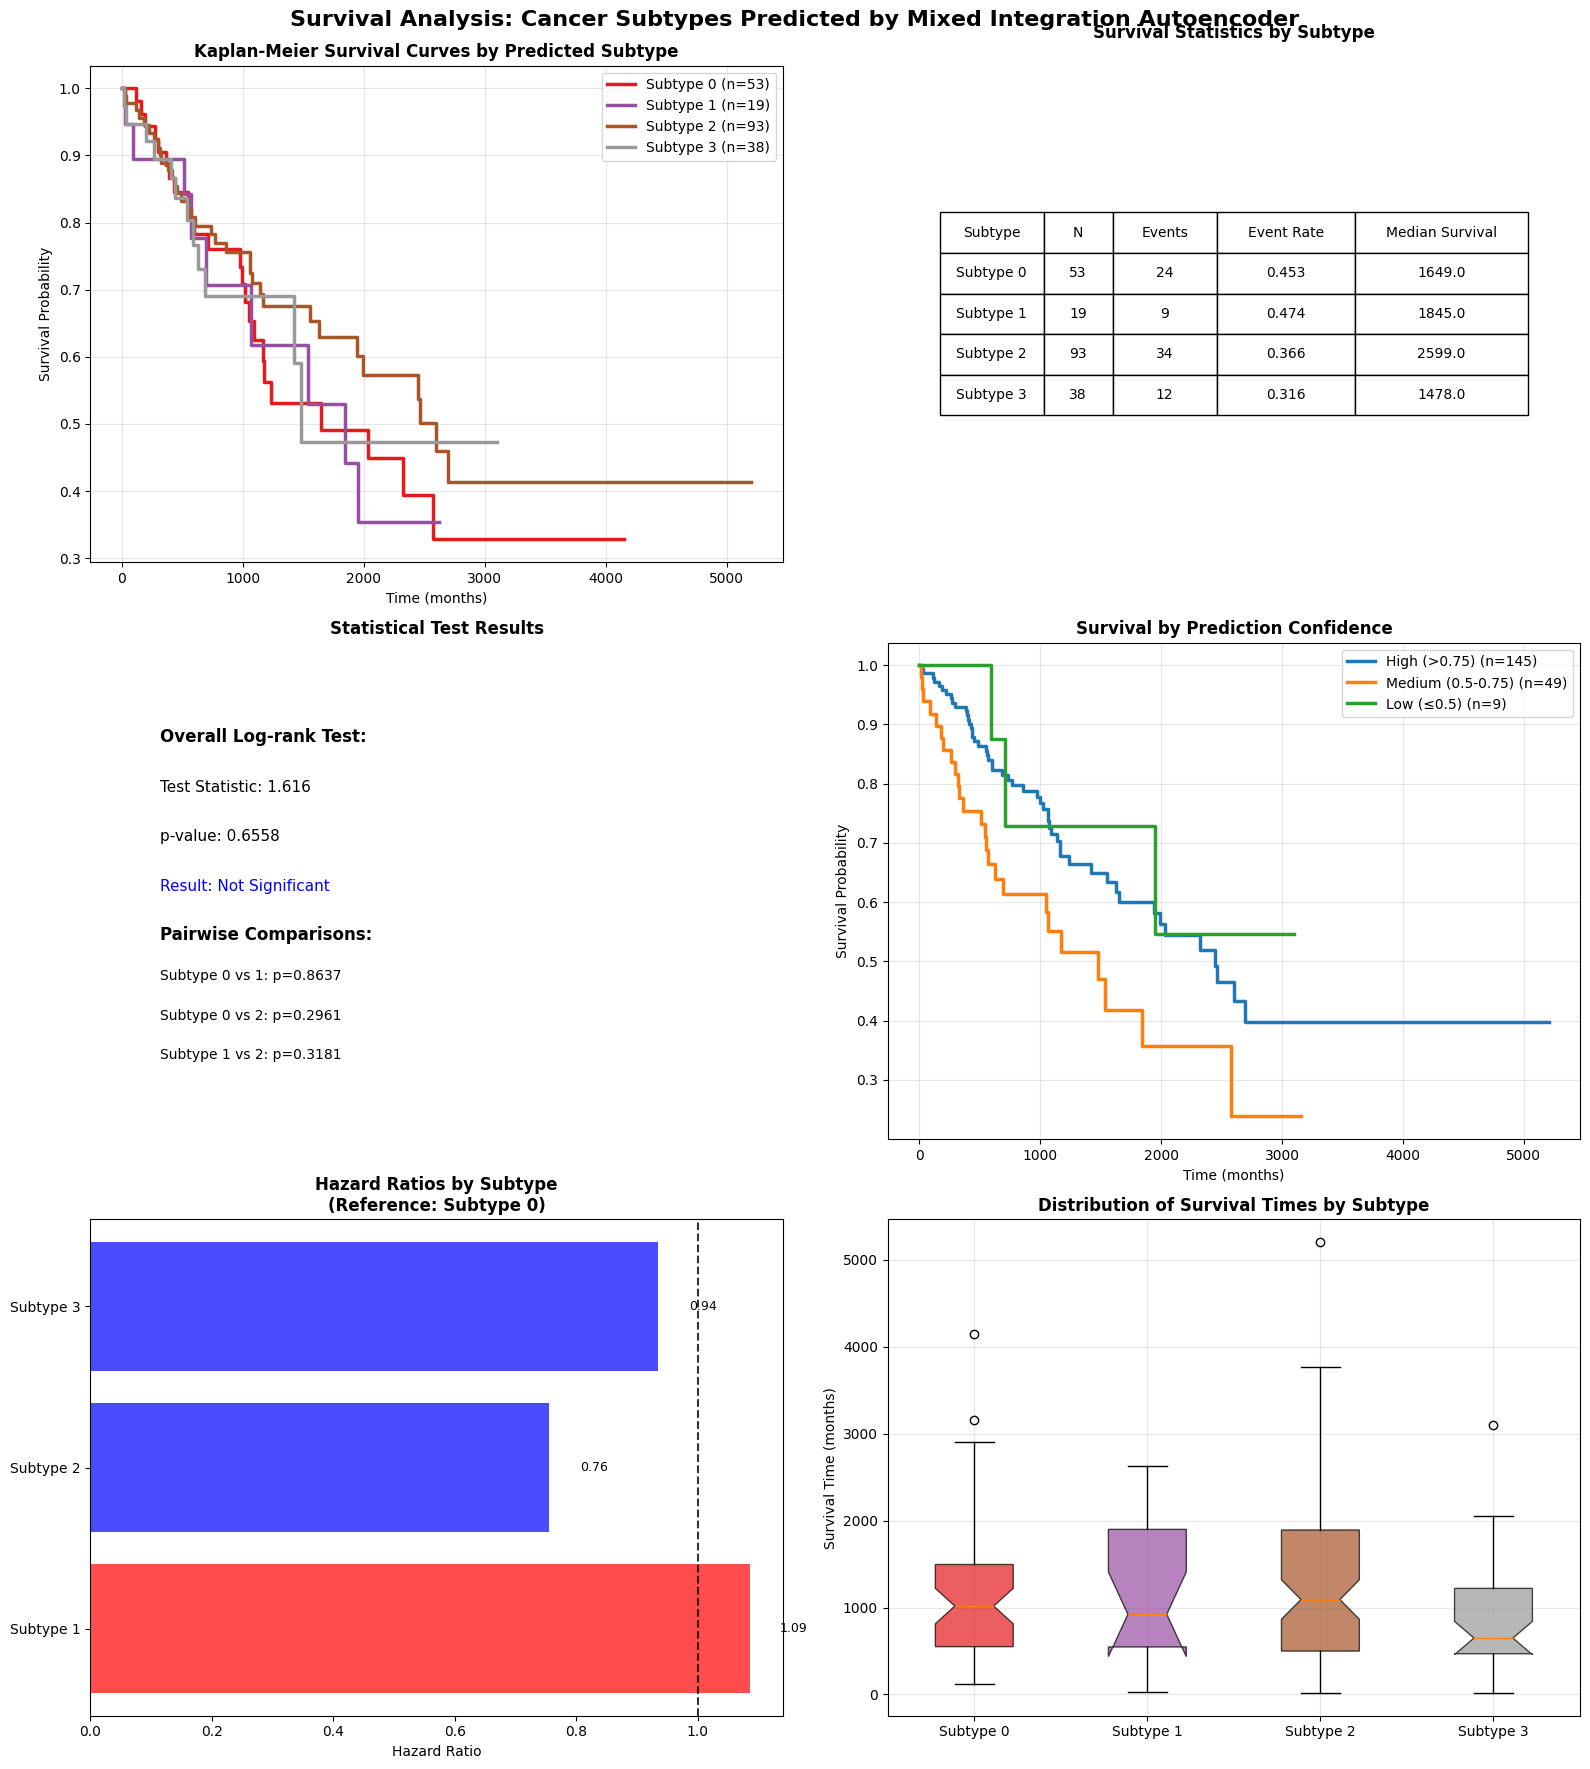


SURVIVAL ANALYSIS SUMMARY
Total patients with survival data: 203
Number of predicted subtypes: 4
Overall event rate (deaths): 0.389
Median follow-up time: 995.0 months


In [28]:
# Comprehensive Survival Analysis Visualization
if len(survival_analysis_df) > 0:
    # Create a comprehensive survival analysis visualization
    fig, axes = plt.subplots(3, 2, figsize=(16, 18))
    fig.suptitle('Survival Analysis: Cancer Subtypes Predicted by Mixed Integration Autoencoder', 
                 fontsize=16, fontweight='bold')
    
    # Color palette for subtypes
    n_subtypes = len(survival_analysis_df['predicted_subtype'].unique())
    colors = plt.cm.Set1(np.linspace(0, 1, n_subtypes))
    subtype_colors = {subtype: colors[i] for i, subtype in enumerate(sorted(survival_analysis_df['predicted_subtype'].unique()))}
    
    # 1. Kaplan-Meier Survival Curves by Predicted Subtype
    kmf = KaplanMeierFitter()
    
    for subtype in sorted(survival_analysis_df['predicted_subtype'].unique()):
        subtype_data = survival_analysis_df[survival_analysis_df['predicted_subtype'] == subtype]
        kmf.fit(subtype_data['OS.time'], subtype_data['OS'], 
                label=f'Subtype {subtype} (n={len(subtype_data)})')
        kmf.plot_survival_function(ax=axes[0, 0], color=subtype_colors[subtype], 
                                 linewidth=2.5, ci_show=False)
    
    axes[0, 0].set_title('Kaplan-Meier Survival Curves by Predicted Subtype', fontweight='bold')
    axes[0, 0].set_xlabel('Time (months)')
    axes[0, 0].set_ylabel('Survival Probability')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].legend(loc='best')
    
    # 2. Survival Statistics Summary
    axes[0, 1].axis('off')
    survival_stats = []
    
    for subtype in sorted(survival_analysis_df['predicted_subtype'].unique()):
        subtype_data = survival_analysis_df[survival_analysis_df['predicted_subtype'] == subtype]
        kmf.fit(subtype_data['OS.time'], subtype_data['OS'])
        
        median_survival = kmf.median_survival_time_
        event_rate = subtype_data['OS'].mean()
        n_patients = len(subtype_data)
        
        survival_stats.append({
            'Subtype': f'Subtype {subtype}',
            'N': n_patients,
            'Events': int(subtype_data['OS'].sum()),
            'Event Rate': f'{event_rate:.3f}',
            'Median Survival': f'{median_survival:.1f}' if not np.isnan(median_survival) else 'Not reached'
        })
    
    stats_df = pd.DataFrame(survival_stats)
    table = axes[0, 1].table(cellText=stats_df.values,
                            colLabels=stats_df.columns,
                            cellLoc='center',
                            loc='center',
                            colWidths=[0.15, 0.1, 0.15, 0.2, 0.25])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    axes[0, 1].set_title('Survival Statistics by Subtype', fontweight='bold', pad=20)
    
    # 3. Log-rank Test Results
    try:
        # Perform pairwise log-rank tests
        subtypes = sorted(survival_analysis_df['predicted_subtype'].unique())
        if len(subtypes) > 1:
            # Overall log-rank test
            results = multivariate_logrank_test(
                survival_analysis_df['OS.time'],
                survival_analysis_df['predicted_subtype'],
                survival_analysis_df['OS']
            )
            
            axes[1, 0].axis('off')
            axes[1, 0].text(0.1, 0.8, f'Overall Log-rank Test:', fontweight='bold', fontsize=12)
            axes[1, 0].text(0.1, 0.7, f'Test Statistic: {results.test_statistic:.3f}', fontsize=11)
            axes[1, 0].text(0.1, 0.6, f'p-value: {results.p_value:.4f}', fontsize=11)
            significance = "Significant" if results.p_value < 0.05 else "Not Significant"
            axes[1, 0].text(0.1, 0.5, f'Result: {significance}', fontsize=11, 
                           color='red' if results.p_value < 0.05 else 'blue')
            axes[1, 0].set_title('Statistical Test Results', fontweight='bold')
            
            # Pairwise comparisons for first few subtypes
            pairwise_results = []
            for i in range(min(3, len(subtypes))):
                for j in range(i+1, min(3, len(subtypes))):
                    subtype_i_data = survival_analysis_df[survival_analysis_df['predicted_subtype'] == subtypes[i]]
                    subtype_j_data = survival_analysis_df[survival_analysis_df['predicted_subtype'] == subtypes[j]]
                    
                    if len(subtype_i_data) > 5 and len(subtype_j_data) > 5:  # Minimum sample size
                        lr_result = logrank_test(
                            subtype_i_data['OS.time'], subtype_j_data['OS.time'],
                            subtype_i_data['OS'], subtype_j_data['OS']
                        )
                        pairwise_results.append({
                            'Comparison': f'Subtype {subtypes[i]} vs {subtypes[j]}',
                            'Test Statistic': f'{lr_result.test_statistic:.3f}',
                            'p-value': f'{lr_result.p_value:.4f}',
                            'Significant': 'Yes' if lr_result.p_value < 0.05 else 'No'
                        })
            
            if pairwise_results:
                y_pos = 0.4
                axes[1, 0].text(0.1, y_pos, 'Pairwise Comparisons:', fontweight='bold', fontsize=12)
                for idx, result in enumerate(pairwise_results):
                    y_pos -= 0.08
                    axes[1, 0].text(0.1, y_pos, f"{result['Comparison']}: p={result['p-value']}", fontsize=10)
    
    except Exception as e:
        axes[1, 0].text(0.1, 0.5, f'Statistical test error: {str(e)}', fontsize=10)
        axes[1, 0].set_title('Statistical Test Results', fontweight='bold')
    
    # 4. Survival by Prediction Confidence
    # Create confidence groups based on max probability
    survival_analysis_df['confidence_group'] = pd.cut(
        survival_analysis_df['max_prob'], 
        bins=[0, 0.5, 0.75, 1.0], 
        labels=['Low (≤0.5)', 'Medium (0.5-0.75)', 'High (>0.75)']
    )
    
    for conf_group in survival_analysis_df['confidence_group'].dropna().unique():
        group_data = survival_analysis_df[survival_analysis_df['confidence_group'] == conf_group]
        if len(group_data) > 2:
            kmf.fit(group_data['OS.time'], group_data['OS'], label=f'{conf_group} (n={len(group_data)})')
            kmf.plot_survival_function(ax=axes[1, 1], linewidth=2.5, ci_show=False)
    
    axes[1, 1].set_title('Survival by Prediction Confidence', fontweight='bold')
    axes[1, 1].set_xlabel('Time (months)')
    axes[1, 1].set_ylabel('Survival Probability')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].legend(loc='best')
    
    # 5. Hazard Ratios (Cox Proportional Hazards Model)
    try:
        # Prepare data for Cox regression
        cox_data = survival_analysis_df[['OS.time', 'OS', 'predicted_subtype']].copy()
        
        # Create dummy variables for subtypes (reference: subtype 0)
        subtype_dummies = pd.get_dummies(cox_data['predicted_subtype'], prefix='subtype')
        cox_data = pd.concat([cox_data, subtype_dummies], axis=1)
        
        # Remove reference category and original subtype column
        reference_col = f'subtype_{sorted(survival_analysis_df["predicted_subtype"].unique())[0]}'
        if reference_col in cox_data.columns:
            cox_data = cox_data.drop([reference_col, 'predicted_subtype'], axis=1)
        
        # Fit Cox model
        cph = CoxPHFitter()
        cph.fit(cox_data, duration_col='OS.time', event_col='OS')
        
        # Plot hazard ratios
        hazard_ratios = cph.summary[['coef', 'exp(coef)', 'p']]
        hazard_ratios.columns = ['Log HR', 'Hazard Ratio', 'p-value']
        
        # Create hazard ratio plot
        hr_values = hazard_ratios['Hazard Ratio'].values
        hr_labels = [col.replace('subtype_', 'Subtype ') for col in hazard_ratios.index]
        
        bars = axes[2, 0].barh(range(len(hr_values)), hr_values, 
                              color=['red' if hr > 1 else 'blue' for hr in hr_values],
                              alpha=0.7)
        axes[2, 0].axvline(x=1, color='black', linestyle='--', alpha=0.8)
        axes[2, 0].set_yticks(range(len(hr_labels)))
        axes[2, 0].set_yticklabels(hr_labels)
        axes[2, 0].set_xlabel('Hazard Ratio')
        axes[2, 0].set_title('Hazard Ratios by Subtype\n(Reference: Subtype 0)', fontweight='bold')
        
        # Add HR values on bars
        for i, (bar, hr, p_val) in enumerate(zip(bars, hr_values, hazard_ratios['p-value'])):
            significance = '*' if p_val < 0.05 else ''
            axes[2, 0].text(hr + 0.05, bar.get_y() + bar.get_height()/2, 
                           f'{hr:.2f}{significance}', va='center', fontsize=9)
        
    except Exception as e:
        axes[2, 0].text(0.5, 0.5, f'Cox regression error: {str(e)}', 
                       ha='center', va='center', transform=axes[2, 0].transAxes)
        axes[2, 0].set_title('Hazard Ratios by Subtype', fontweight='bold')
    
    # 6. Survival Distribution by Subtype (Box Plot)
    survival_times_by_subtype = []
    subtype_labels = []
    
    for subtype in sorted(survival_analysis_df['predicted_subtype'].unique()):
        subtype_data = survival_analysis_df[survival_analysis_df['predicted_subtype'] == subtype]
        survival_times_by_subtype.append(subtype_data['OS.time'].values)
        subtype_labels.append(f'Subtype {subtype}')
    
    box_plot = axes[2, 1].boxplot(survival_times_by_subtype, labels=subtype_labels, 
                                 patch_artist=True, notch=True)
    
    # Color the boxes
    for patch, color in zip(box_plot['boxes'], [subtype_colors[s] for s in sorted(survival_analysis_df['predicted_subtype'].unique())]):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[2, 1].set_ylabel('Survival Time (months)')
    axes[2, 1].set_title('Distribution of Survival Times by Subtype', fontweight='bold')
    axes[2, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n" + "="*80)
    print("SURVIVAL ANALYSIS SUMMARY")
    print("="*80)
    print(f"Total patients with survival data: {len(survival_analysis_df)}")
    print(f"Number of predicted subtypes: {len(survival_analysis_df['predicted_subtype'].unique())}")
    print(f"Overall event rate (deaths): {survival_analysis_df['OS'].mean():.3f}")
    print(f"Median follow-up time: {survival_analysis_df['OS.time'].median():.1f} months")
    
else:
    print("Cannot perform survival analysis - no matching samples between survival and prediction data")